Time series analysis is a powerful statistical technique used to analyze and interpret temporal data points collected or recorded at successive time intervals. This tutorial will provide an overview of the key concepts, techniques, and tools used in time series analysis.

### 1. Introduction to Time Series

#### What is a Time Series?
A time series is a sequence of data points recorded at specific time intervals. Examples include daily stock prices, monthly sales data, annual GDP, and temperature recordings.

#### Components of Time Series
1. **Trend**: The long-term movement in the data.
2. **Seasonality**: Regular pattern recurring at specific periods.
3. **Cyclical**: Long-term fluctuations due to economic cycles.
4. **Irregular/Noise**: Random variations that do not follow a pattern.

### 2. Types of Time Series Data
1. **Univariate**: A single variable recorded over time.
2. **Multivariate**: Multiple variables recorded over time.

### 3. Time Series Visualization
Visualization is crucial for understanding the underlying patterns in the data.

#### Common Plots
- **Line Plot**: Basic plot for time series data.
- **Seasonal Plot**: Shows data patterns within a single year.
- **Autocorrelation Plot (ACF)**: Shows the correlation of the time series with its own past values.

### 4. Decomposition of Time Series
Decomposing time series data helps in understanding its underlying components (trend, seasonality, and noise).

#### Methods
- **Additive Decomposition**: When the components are added together.
- **Multiplicative Decomposition**: When the components multiply together.

### 5. Time Series Smoothing
Smoothing techniques help in identifying trends by reducing noise.

#### Techniques
- **Moving Average**: Calculates the average of different subsets of the dataset.
- **Exponential Smoothing**: Gives more weight to recent observations.

### 6. Stationarity
A stationary time series has statistical properties (mean, variance) that do not change over time. Stationarity is essential for many time series models.

#### Tests for Stationarity
- **Augmented Dickey-Fuller (ADF) Test**
- **KPSS Test**

### 7. Time Series Models

#### ARIMA Model
ARIMA (AutoRegressive Integrated Moving Average) is one of the most popular models for time series forecasting.

- **AR (AutoRegressive) Component**: Involves regressing the variable on its own lagged values.
- **I (Integrated) Component**: Involves differencing the data to make it stationary.
- **MA (Moving Average) Component**: Involves modeling the error term as a linear combination of error terms occurring at different times.

#### Seasonal ARIMA (SARIMA)
Extends ARIMA by adding seasonal components.

#### Exponential Smoothing State Space Model (ETS)
Uses exponential smoothing to model the time series data.

### 8. Model Evaluation
To evaluate the performance of time series models, common metrics include:
- **Mean Absolute Error (MAE)**
- **Mean Squared Error (MSE)**
- **Root Mean Squared Error (RMSE)**
- **Mean Absolute Percentage Error (MAPE)**

### 9. Forecasting
Once the model is built and validated, it can be used for forecasting future values.

### 10. Practical Implementation with Python
Here's an example of how to implement basic time series analysis and modeling in Python using libraries like `pandas`, `statsmodels`, and `matplotlib`.

### Conclusion
This tutorial covers the basics of time series analysis, including visualization, decomposition, stationarity, modeling, and forecasting. The practical example using Python demonstrates how to apply these concepts to real data. With these tools, you can effectively analyze and forecast time series data.

# Example 1 : Temperature data

         Date  Temp
0  01-01-1981  20.7
1  02-01-1981  17.9
2  03-01-1981  18.8
3  04-01-1981  14.6
4  05-01-1981  15.8


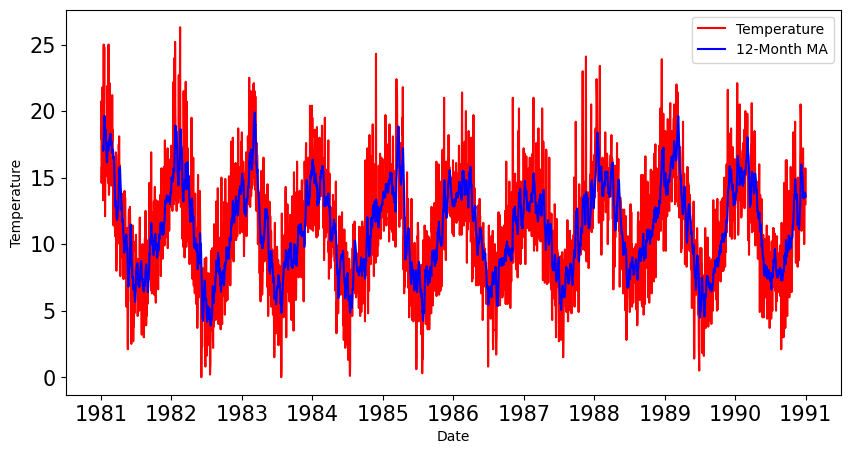

   Series  Year  Month  Temp
0       1  1981      1  20.7
1       2  1981      1  17.9
2       3  1981      1  18.8
3       4  1981      1  14.6
4       5  1981      1  15.8


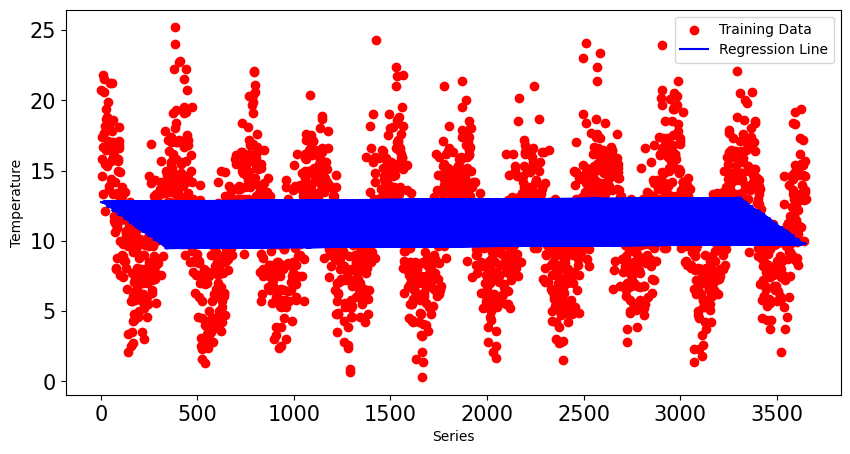

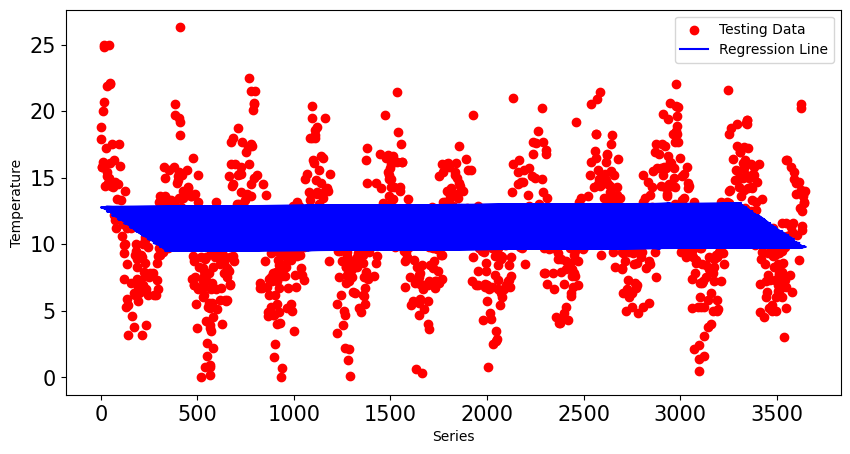

Coefficients: [ 0.0014056  -0.48340405 -0.34063787]
Intercept: 970.7231421664311

Regression Report
------------------
Mean Absolute Error (MAE): 3.18
Mean Squared Error (MSE): 16.08
R-squared (R2): 0.08


In [8]:
# Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Load the dataset
dataset = pd.read_csv('Temperature.csv')

# Display the dataset
print(dataset.head())

dataset.info()

# Convert the 'Date' column to datetime format
dataset['Date'] = pd.to_datetime(dataset['Date'], dayfirst=True)

# Create 12-month moving average
dataset['MA12'] = dataset['Temp'].rolling(12).mean()

# Plot the temperature and moving average
plt.figure(figsize=(10, 5))
plt.plot(dataset['Date'], dataset['Temp'], color='red', label='Temperature')
plt.plot(dataset['Date'], dataset['MA12'], color='blue', label='12-Month MA')
plt.xlabel('Date')
plt.ylabel('Temperature')
plt.legend()
plt.show()

# Extract month and year from dates
dataset['Month'] = dataset['Date'].dt.month
dataset['Year'] = dataset['Date'].dt.year

# Create a sequence of numbers
dataset['Series'] = np.arange(1, len(dataset) + 1)

# Drop unnecessary columns and rearrange
dataset.drop(['Date', 'MA12'], axis=1, inplace=True)
dataset = dataset[['Series', 'Year', 'Month', 'Temp']]

# Check the head of the dataset
print(dataset.head())

# Independent Variable (X) and Dependent Variable (y)
X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, -1].values

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=1/3, random_state=0)

# Training the Simple Linear Regression model
reg = LinearRegression()
reg.fit(X_train, y_train)

# Prediction of testing dataset
y_pred = reg.predict(X_test)

# Visualize the results
plt.figure(figsize=(10, 5))
plt.scatter(X_train[:, 0], y_train, color='red', label='Training Data')
plt.plot(X_train[:, 0], reg.predict(X_train), color='blue', label='Regression Line')
plt.xlabel('Series')
plt.ylabel('Temperature')
plt.legend()
plt.show()

# Visualize the results for test set
plt.figure(figsize=(10, 5))
plt.scatter(X_test[:, 0], y_test, color='red', label='Testing Data')
plt.plot(X_train[:, 0], reg.predict(X_train), color='blue', label='Regression Line')
plt.xlabel('Series')
plt.ylabel('Temperature')
plt.legend()
plt.show()

# Coefficient
b = reg.coef_
print("Coefficients:", b)

# Intercept
a = reg.intercept_
print("Intercept:", a)

# Regression Report
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("\nRegression Report")
print("------------------")
print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"R-squared (R2): {r2:.2f}")


Based on the regression report metrics, let's analyze the model's performance:

### Metrics:
- **Mean Absolute Error (MAE): 3.18**
  - MAE indicates that, on average, the predicted temperature deviates from the actual temperature by 3.18 degrees.
  
- **Mean Squared Error (MSE): 16.08**
  - MSE measures the average squared difference between the predicted and actual temperatures. A higher MSE value indicates larger errors, with the squaring penalizing larger errors more than smaller ones.

- **R-squared (R2): 0.08**
  - R-squared explains the proportion of the variance in the dependent variable (temperature) that is predictable from the independent variables (series, year, and month). An R2 value of 0.08 means that only 8% of the variance in temperature can be explained by the model.

### Inference:
1. **Low R-squared Value:**
   - An R-squared value of 0.08 is quite low, suggesting that the model does not explain much of the variability in the temperature data. This implies that the chosen features (Series, Year, and Month) are not very effective in predicting the temperature.

2. **High MAE and MSE:**
   - While these values depend on the range of the temperature values in the dataset, the MAE of 3.18 and MSE of 16.08 suggest that there is a significant error in the predictions. Considering that temperatures usually vary within a limited range, these error values indicate that the model's predictions are not very accurate.

### Possible Reasons for Poor Performance:
1. **Insufficient Features:**
   - The model currently uses Series, Year, and Month as features. Temperature can be influenced by many other factors such as geographical location, altitude, weather patterns, and seasonal effects that are not captured by these features.

2. **Complexity of Temperature Patterns:**
   - Temperature patterns can be complex and influenced by non-linear relationships, which a simple linear regression model might not capture effectively.

### Recommendations:
1. **Feature Engineering:**
   - Introduce additional relevant features such as geographical coordinates, altitude, humidity, or other weather-related variables.
   
2. **Model Complexity:**
   - Consider using more complex models such as polynomial regression, decision trees, random forests, or gradient boosting which can capture non-linear relationships better than simple linear regression.

3. **Time Series Analysis:**
   - Since the data involves dates and temperature, applying time series analysis methods like ARIMA, SARIMA, or LSTM (for more advanced techniques) could potentially yield better predictions.

4. **Cross-Validation:**
   - Use cross-validation to better assess the model's performance and ensure that the results are consistent across different subsets of the data.

By considering these recommendations, you can build a more robust and accurate model for predicting temperature.

# Example 2 : Problem Statement

### Problem Statement

#### Sales Data Analysis and Visualization

**Objective:**
To analyze and visualize sales data from January 2001 to December 2003, identify patterns, trends, and insights that can help in understanding the sales performance over the given period.

**Dataset:**
The dataset consists of 36 monthly sales records. Each record includes:
- `Month`: The month of the sales data in 'MM-YY' format.
- `Sales`: The sales figures for that month.
- `Time_Stamp`: The corresponding datetime for the given month.

**Goals:**
1. **Data Processing:**
   - Load the dataset.
   - Convert the 'Month' column to a datetime format and set it as the index.
   - Drop unnecessary columns for further analysis.

2. **Exploratory Data Analysis (EDA):**
   - Plot the sales data over time to visualize trends.
   - Create boxplots to understand the distribution of sales data across different years and months.
   - Generate pivot tables to analyze monthly and quarterly sales across different years.
   - Calculate and visualize the Empirical Cumulative Distribution Function (ECDF) of sales.
   - Group the data by date to get average sales and percent changes over time.
   - Visualize the average sales over time and the percent change in sales.
   - Plot the average monthly sales for each year.
   - Calculate and visualize the total yearly sales.

3. **Statistical Analysis:**
   - Perform statistical analysis to derive meaningful insights from the sales data.
   - Evaluate key metrics such as mean sales, median sales, and sales variability.

**Expected Outcomes:**
- **Trends Identification:**
  Identify any upward or downward trends in sales over the given period.
- **Seasonality Analysis:**
  Determine if there are any seasonal patterns in the sales data.
- **Performance Metrics:**
  Calculate key performance metrics to summarize the sales performance.
- **Actionable Insights:**
  Provide insights that can help in decision-making for sales strategies, inventory management, and marketing efforts.

**Tools and Libraries:**
- **Python Libraries:**
  - `pandas` for data manipulation and analysis.
  - `matplotlib` and `seaborn` for data visualization.
  - `statsmodels` for statistical analysis.
- **Jupyter Notebook:**
  - An interactive environment to write and run Python code, visualize data, and document the analysis process.

**Methodology:**
1. **Data Loading and Cleaning:**
   - Read the CSV file and inspect the data.
   - Convert the 'Month' column to a datetime format.
   - Set the 'Time_Stamp' column as the index for time series analysis.
   - Drop unnecessary columns.

2. **Visualization and Analysis:**
   - Plot the sales data over time.
   - Create boxplots to understand sales distribution by year and month.
   - Generate pivot tables for monthly and quarterly analysis.
   - Plot the ECDF of sales.
   - Calculate and visualize average sales and percent change over time.
   - Plot average monthly sales by year and total yearly sales.

3. **Interpretation:**
   - Interpret the visualizations and statistical metrics to derive insights.
   - Identify any significant patterns or anomalies in the sales data.
   - Summarize the findings and provide recommendations based on the analysis.

By following this approach, the analysis will provide a comprehensive understanding of the sales performance from January 2001 to December 2003, aiding in strategic planning and decision-making.

  Month  Sales
0  1-01  266.0
1  1-02  145.9
2  1-03  183.1
3  1-04  119.3
4  1-05  180.3
(36, 2)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36 entries, 0 to 35
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Month   36 non-null     object 
 1   Sales   36 non-null     float64
dtypes: float64(1), object(1)
memory usage: 704.0+ bytes
None
DatetimeIndex(['2001-01-31', '2001-02-28', '2001-03-31', '2001-04-30',
               '2001-05-31', '2001-06-30', '2001-07-31', '2001-08-31',
               '2001-09-30', '2001-10-31', '2001-11-30', '2001-12-31',
               '2002-01-31', '2002-02-28', '2002-03-31', '2002-04-30',
               '2002-05-31', '2002-06-30', '2002-07-31', '2002-08-31',
               '2002-09-30', '2002-10-31', '2002-11-30', '2002-12-31',
               '2003-01-31', '2003-02-28', '2003-03-31', '2003-04-30',
               '2003-05-31', '2003-06-30', '2003-07-31', '2003-08-31',
               '2003-0

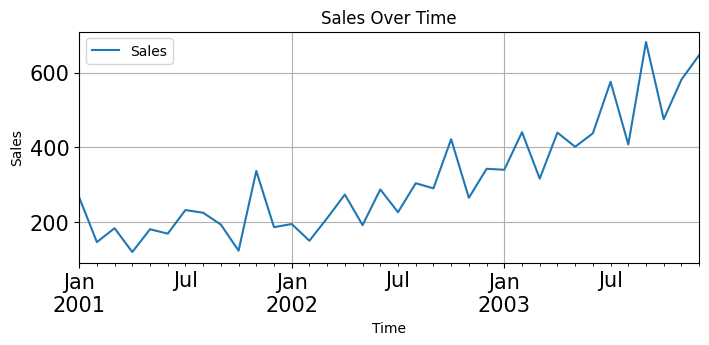

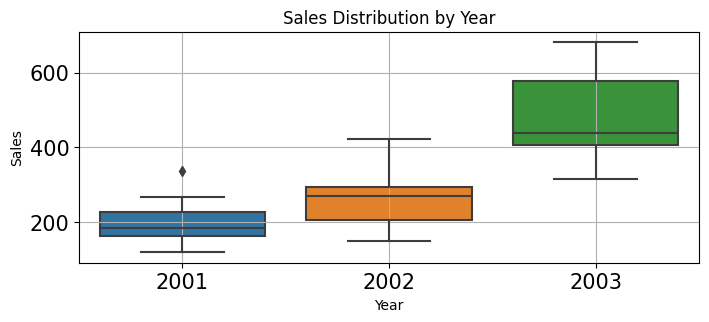

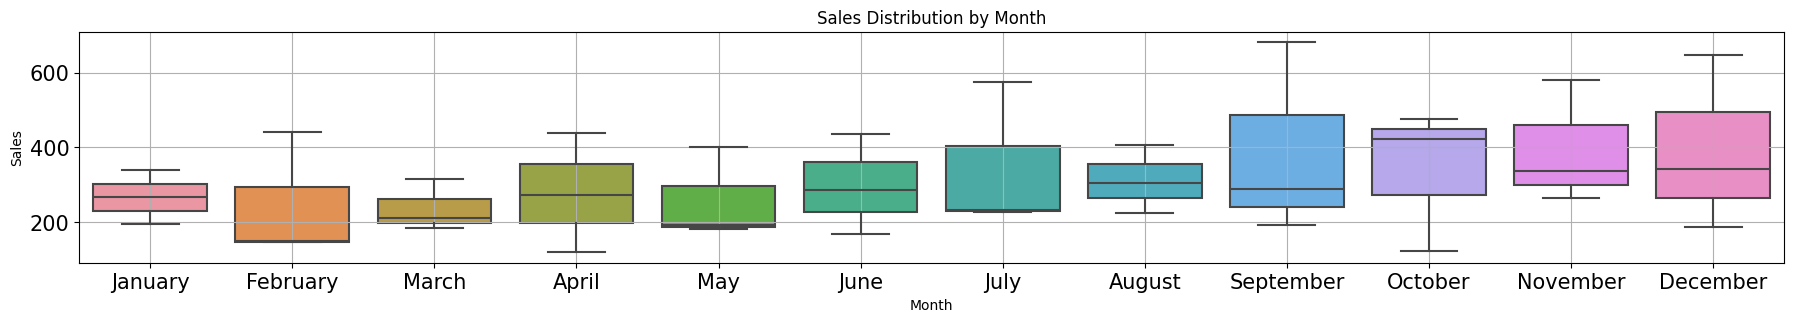

Time_Stamp  April  August  December  February  January   July   June  March  \
Time_Stamp                                                                    
2001        119.3   224.5     185.9     145.9    266.0  231.8  168.5  183.1   
2002        273.3   303.6     342.3     149.5    194.3  226.0  287.0  210.1   
2003        439.3   407.6     646.9     440.4    339.7  575.5  437.4  315.9   

Time_Stamp    May  November  October  September  
Time_Stamp                                       
2001        180.3     336.5    122.9      192.8  
2002        191.4     264.5    421.6      289.9  
2003        401.3     581.3    475.3      682.0  


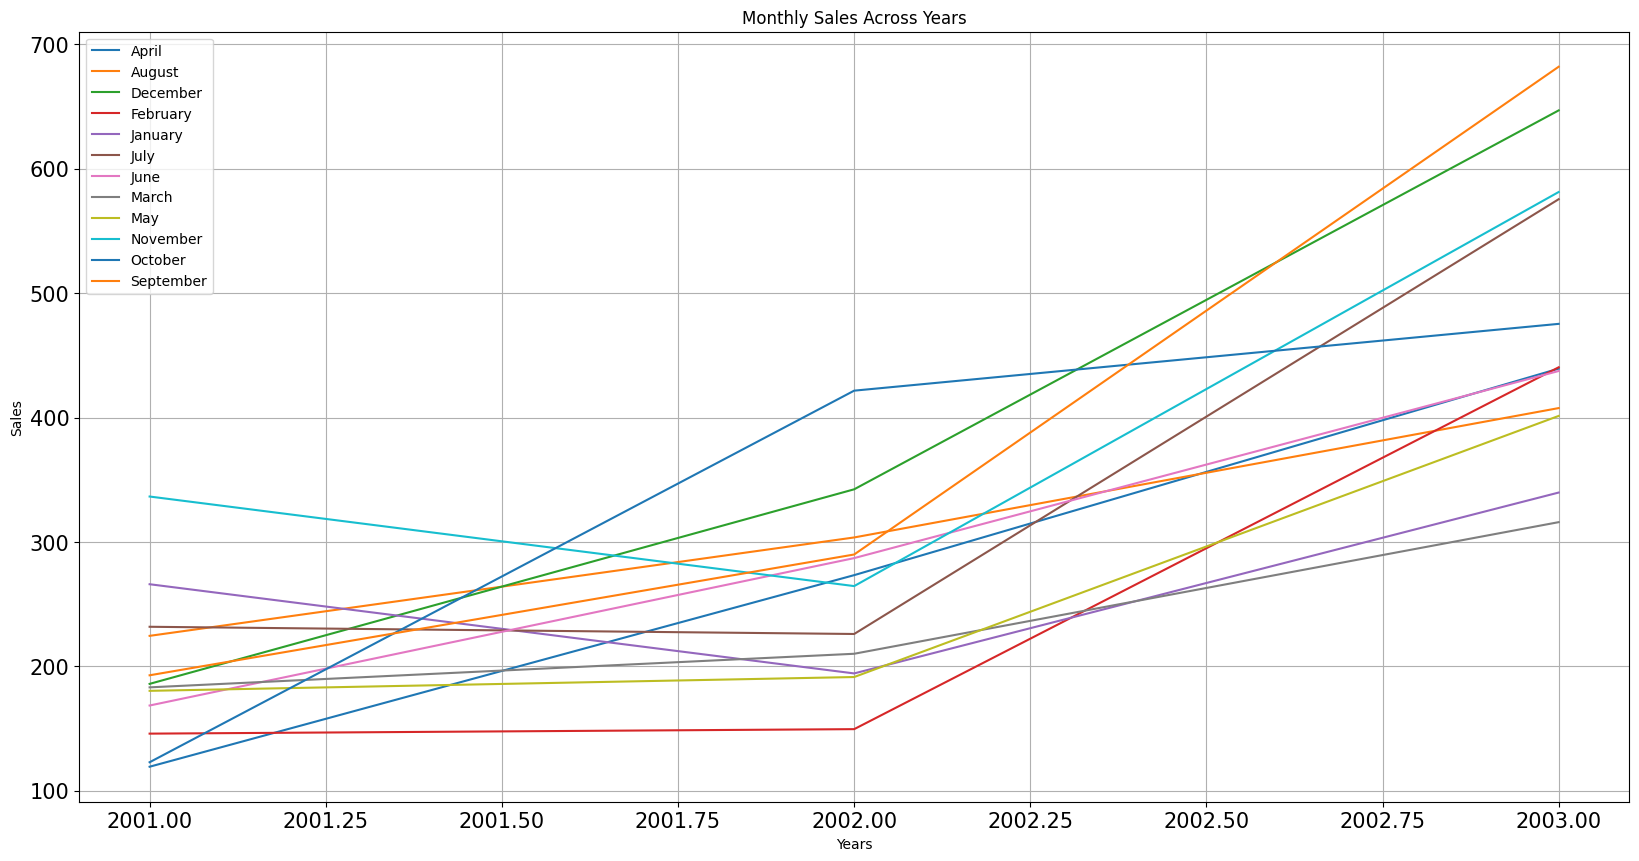

Time_Stamp           1           2           3           4
Time_Stamp                                                
2001        198.333333  156.033333  216.366667  215.100000
2002        184.633333  250.566667  273.166667  342.800000
2003        365.333333  426.000000  555.033333  567.833333


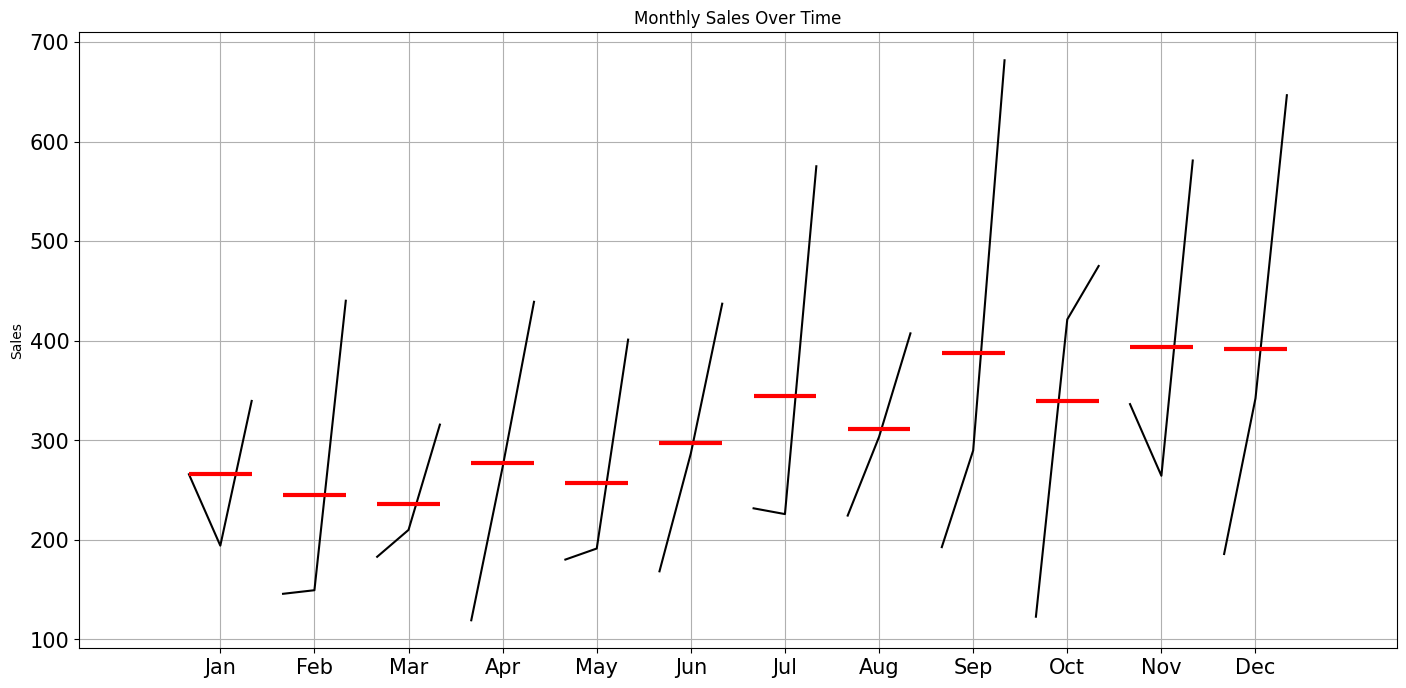

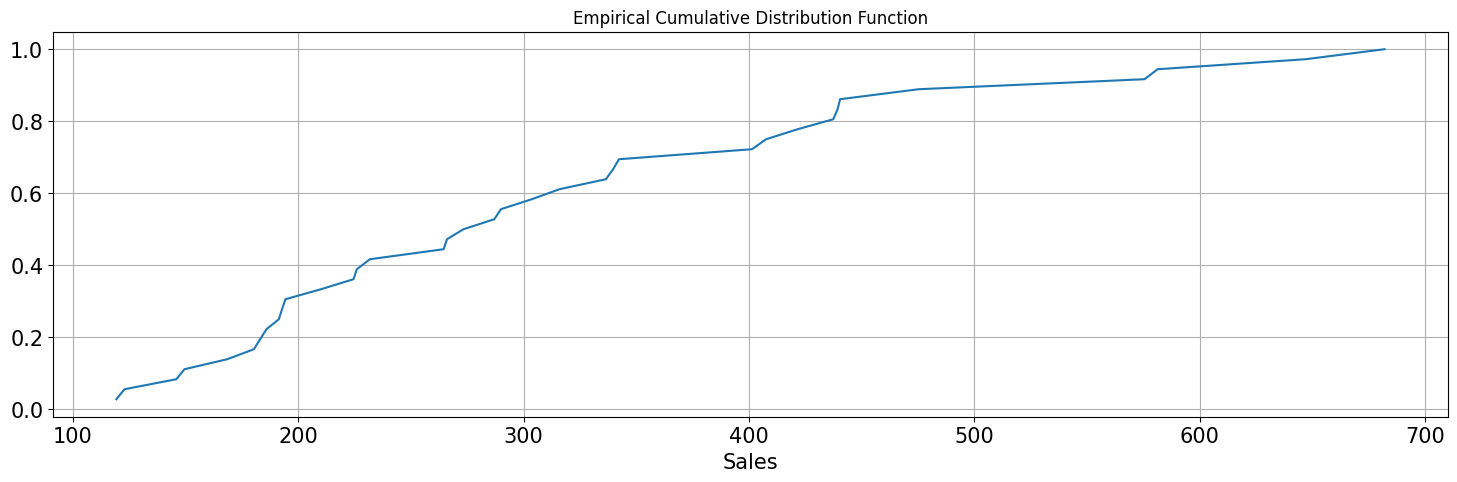

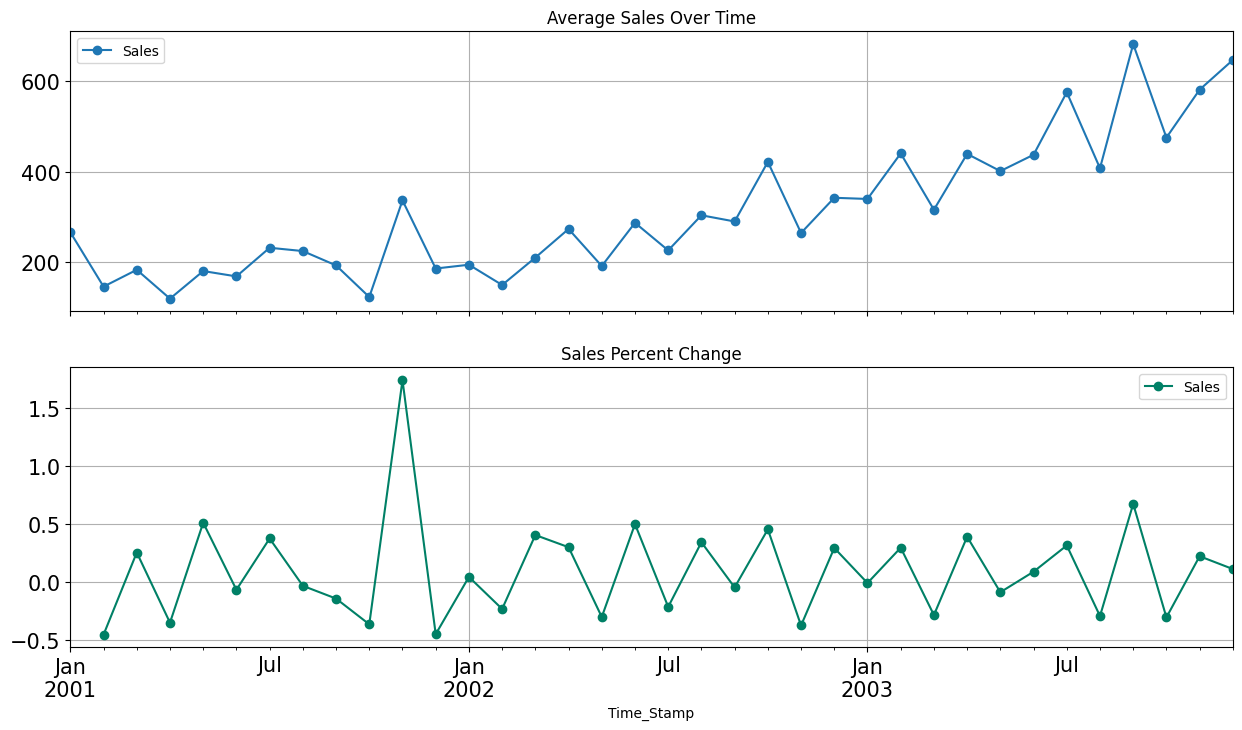

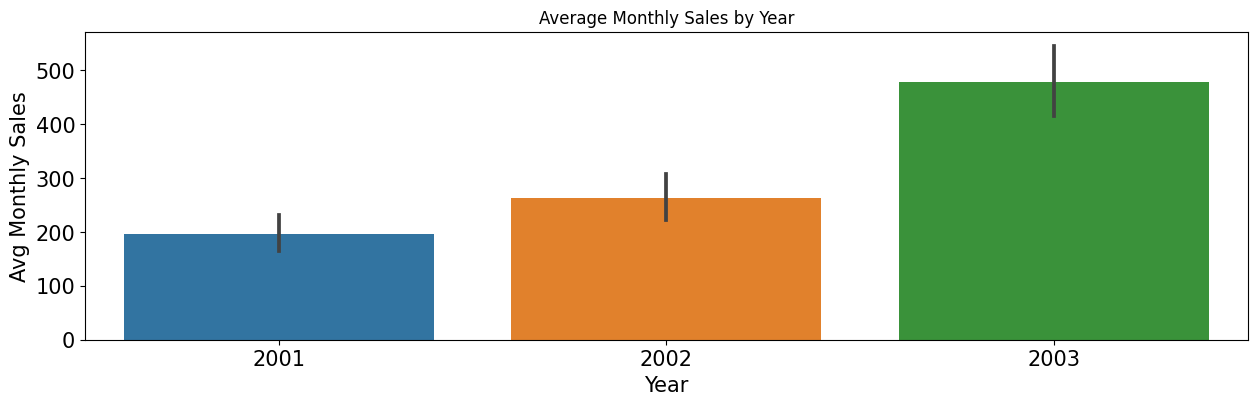

Time_Stamp
2001    2357.5
2002    3153.5
2003    5742.6
dtype: float64


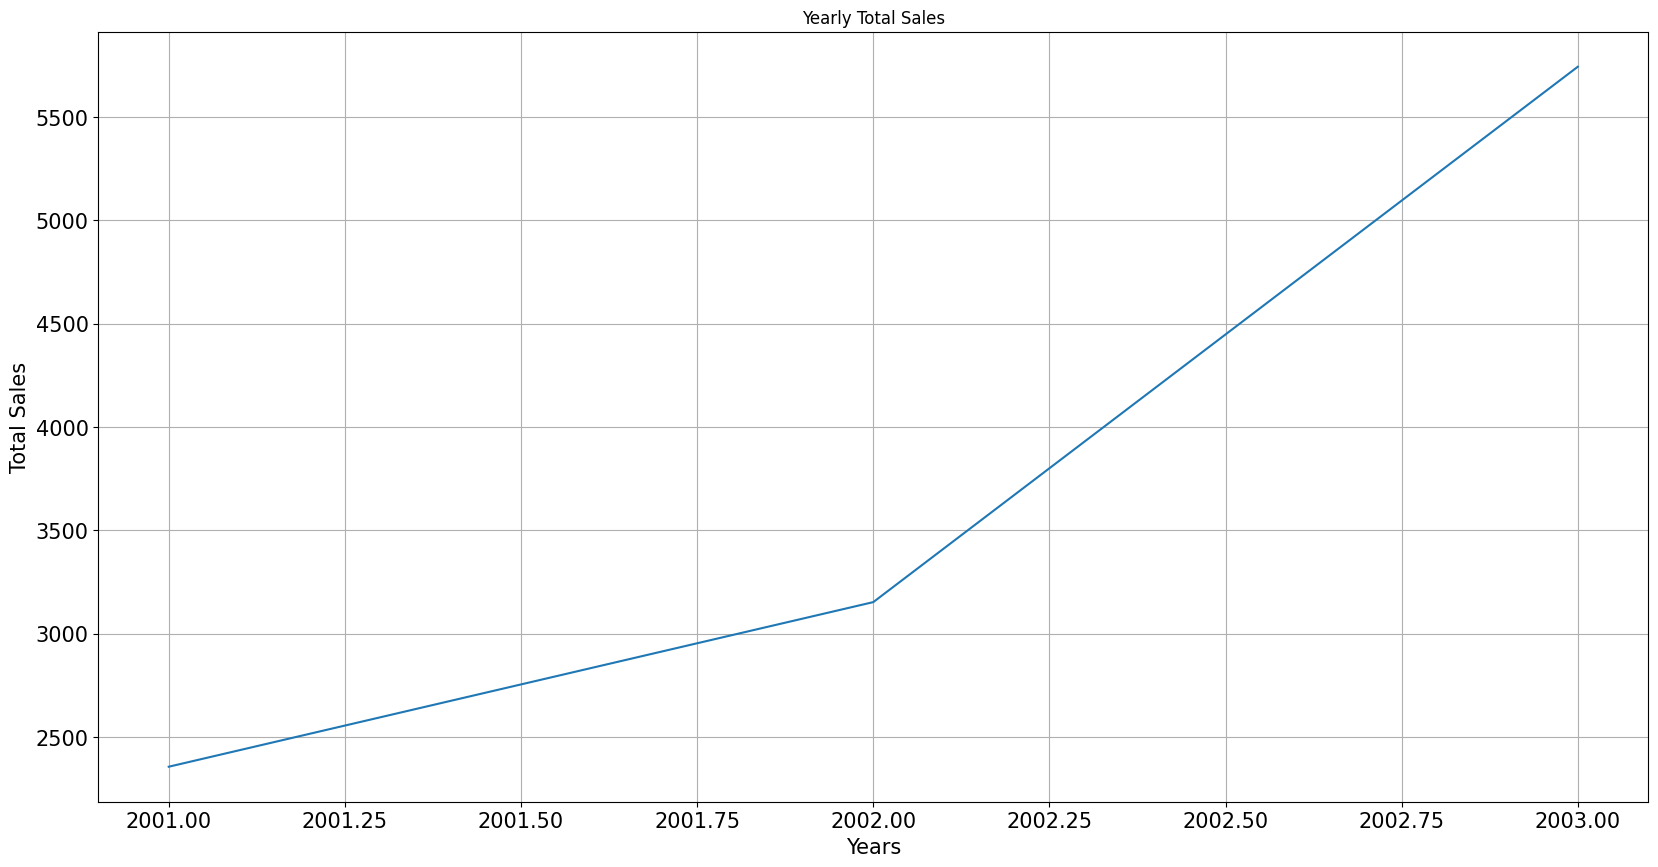

In [10]:
# Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from pylab import rcParams
from statsmodels.graphics.tsaplots import month_plot
from statsmodels.distributions.empirical_distribution import ECDF

# Load the dataset
df = pd.read_csv('Temp2.csv')

# Display the first few rows of the dataset
print(df.head())

# Check the shape and information of the dataset
print(df.shape)
print(df.info())

# Create a date range for the time stamps
date = pd.date_range(start='1/1/2001', end='12/31/2003', freq='M')
print(date)

# Add the date range to the dataframe
df['Time_Stamp'] = pd.DataFrame(date, columns=['Date'])
print(df.head())

# Set the Time_Stamp column as the index
df = df.set_index('Time_Stamp')
print(df.head())

# Drop the 'Month' column as it is not needed anymore
df1 = df.drop(['Month'], axis=1)
print(df1.head())

# Plot the sales data
df1.plot(figsize=(8, 3))
plt.grid()
plt.title("Sales Over Time")
plt.xlabel("Time")
plt.ylabel("Sales")
plt.show()

# Boxplot of sales data by year
_, ax = plt.subplots(figsize=(8, 3))
sns.boxplot(x=df1.index.year, y=df1.values[:, 0], ax=ax)
plt.grid()
plt.title("Sales Distribution by Year")
plt.xlabel("Year")
plt.ylabel("Sales")
plt.show()

# Boxplot of sales data by month
_, ax = plt.subplots(figsize=(22, 3))
sns.boxplot(x=df1.index.month_name(), y=df1.values[:, 0], ax=ax)
plt.grid()
plt.title("Sales Distribution by Month")
plt.xlabel("Month")
plt.ylabel("Sales")
plt.show()

# Pivot table of monthly sales across years
monthly_sales_across_years = pd.pivot_table(df1, 
                                            values='Sales',
                                            columns=df1.index.month_name(), 
                                            index=df1.index.year)
print(monthly_sales_across_years)

# Plot the pivot table of monthly sales across years
monthly_sales_across_years.plot(figsize=(20, 10))
plt.grid()
plt.title("Monthly Sales Across Years")
plt.xlabel("Years")
plt.ylabel("Sales")
plt.legend(loc='best')
plt.show()

# Pivot table of quarterly turnover
quarterly_turnover = pd.pivot_table(df1, values="Sales", 
                                    columns=df1.index.quarter, 
                                    index=df1.index.year)
print(quarterly_turnover)

# Plot monthly sales over time
rcParams['figure.figsize'] = 17, 8
plt.rc('xtick', labelsize=15)
plt.rc('ytick', labelsize=15)
month_plot(df1['Sales'], ylabel='Sales')
plt.grid()
plt.title("Monthly Sales Over Time")
plt.show()

# Empirical Cumulative Distribution Function (ECDF)
plt.figure(figsize=(18, 5))
cdf = ECDF(df1['Sales'])
plt.plot(cdf.x, cdf.y, label="statmodels")
plt.grid()
plt.rc('xtick', labelsize=15)
plt.rc('ytick', labelsize=15)
plt.xlabel('Sales', fontsize=15)
plt.title("Empirical Cumulative Distribution Function")
plt.show()

# Group by date and get average Sales, and percent change
average = df1.groupby(df1.index)["Sales"].mean()
pct_change = df1.groupby(df1.index)["Sales"].sum().pct_change()

# Plot average Sales over time
fig, (axis1, axis2) = plt.subplots(2, 1, sharex=True, figsize=(15, 8))
ax1 = average.plot(legend=True, ax=axis1, 
                   marker='o', 
                   title="Average Sales Over Time", 
                   grid=True)
ax1.set_xticks(range(len(average)))
ax1.set_xticklabels(average.index.tolist())

# Plot percent change for Sales over time
ax2 = pct_change.plot(legend=True, ax=axis2, 
                      marker='o', 
                      colormap="summer", 
                      title="Sales Percent Change", 
                      grid=True)
plt.show()

# Plot sales for every year
fig, axis1 = plt.subplots(1, figsize=(15, 4))
sns.barplot(x=df1.index.year, y=df1.values[:, 0], ax=axis1)
plt.rc('xtick', labelsize=15)
plt.rc('ytick', labelsize=15)
plt.xlabel('Year', fontsize=15)
plt.ylabel('Avg Monthly Sales', fontsize=15)
plt.title("Average Monthly Sales by Year")
plt.show()

# Calculate yearly total sales
yearly_total_sales = monthly_sales_across_years.sum(axis=1, skipna=True)
print(yearly_total_sales)

# Plot yearly total sales
yearly_total_sales.plot(figsize=(20, 10))
plt.grid()
plt.xlabel('Years', fontsize=15)
plt.ylabel('Total Sales', fontsize=15)
plt.title("Yearly Total Sales")
plt.rc('xtick', labelsize=15)
plt.rc('ytick', labelsize=15)
plt.show()


# Example 3: Sales data

### Case Study: Analyzing and Forecasting Monthly Sales Data

#### Problem Statement

**Title:** **Analysis and Forecasting of Perrin Freres Monthly Champagne Sales**

**Objective:**

The objective of this case study is to analyze the monthly sales data of Perrin Freres Champagne from January 1964 to September 1972 and develop a model to forecast future sales. The analysis will focus on identifying trends, seasonality, and stationarity in the data, and the model will aim to provide accurate sales forecasts to support business decisions.

**Background:**

Perrin Freres, a renowned champagne producer, has been recording its monthly sales data for several years. Understanding the sales patterns is crucial for efficient inventory management, production planning, and marketing strategy. The company seeks to leverage historical sales data to predict future sales accurately.

**Data Description:**

The dataset contains two columns:
- **Month:** The month and year of the sales record (e.g., "1964-01").
- **Sales:** The number of champagne sales (in millions) for the corresponding month.

**Challenges:**

1. **Stationarity:** Determine if the time series data is stationary or non-stationary. Non-stationary data may require differencing to make it stationary.
2. **Trend and Seasonality:** Identify and account for any trends and seasonal patterns in the sales data.
3. **Model Selection:** Choose an appropriate model to forecast future sales, ensuring it captures the underlying patterns in the data.

**Approach:**

1. **Data Cleaning and Preprocessing:**
   - Load and clean the dataset, handling any missing values.
   - Convert the "Month" column to a datetime format and set it as the index.

2. **Exploratory Data Analysis (EDA):**
   - Plot the sales data to visualize trends and patterns.
   - Generate summary statistics to understand the distribution of sales values.

3. **Stationarity Testing:**
   - Perform the Augmented Dickey-Fuller (ADF) test to check for stationarity.
   - If the data is non-stationary, apply differencing and re-test for stationarity.

4. **Model Development:**
   - Develop an ARIMA (AutoRegressive Integrated Moving Average) model to forecast future sales.
   - Split the data into training and testing sets to evaluate model performance.

5. **Model Evaluation:**
   - Calculate evaluation metrics such as Mean Absolute Error (MAE), Mean Squared Error (MSE), and R-squared (R2) to assess model accuracy.
   - Interpret the results and provide insights into the model's performance.

6. **Forecasting:**
   - Use the trained ARIMA model to forecast future sales.
   - Plot the historical and forecasted sales to visualize the predictions.

**Expected Outcomes:**

- A clear understanding of the sales trends and patterns over the years.
- An accurate ARIMA model capable of forecasting future sales.
- Insights into the model's performance through evaluation metrics.
- Recommendations for further improvements or alternative modeling approaches.

**Conclusion:**

By analyzing and forecasting Perrin Freres' monthly champagne sales, this case study aims to provide valuable insights and practical solutions for enhancing business operations. The findings and forecasts will assist in making informed decisions related to production, inventory management, and marketing strategies.

---

This problem statement outlines the key aspects and steps of the case study, providing a clear direction for analyzing and forecasting the sales data.

# Example 1: Basic Temperature

         Date  Temp
0  01-01-1981  20.7
1  02-01-1981  17.9
2  03-01-1981  18.8
3  04-01-1981  14.6
4  05-01-1981  15.8


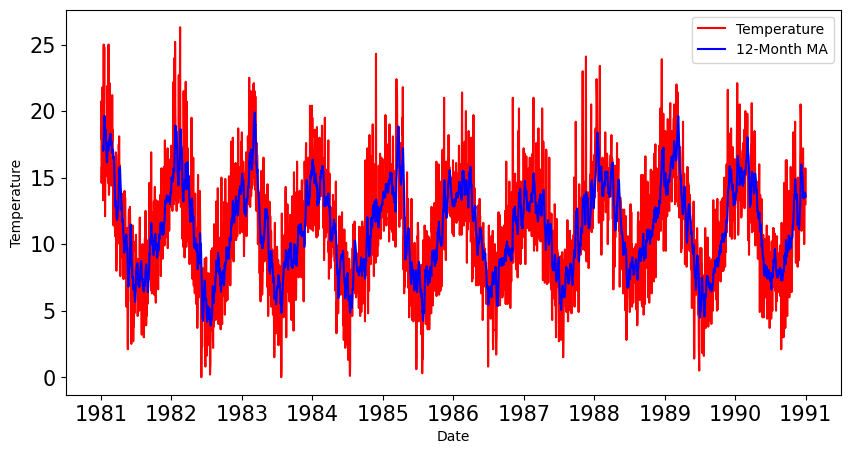

   Series  Year  Month  Temp
0       1  1981      1  20.7
1       2  1981      1  17.9
2       3  1981      1  18.8
3       4  1981      1  14.6
4       5  1981      1  15.8


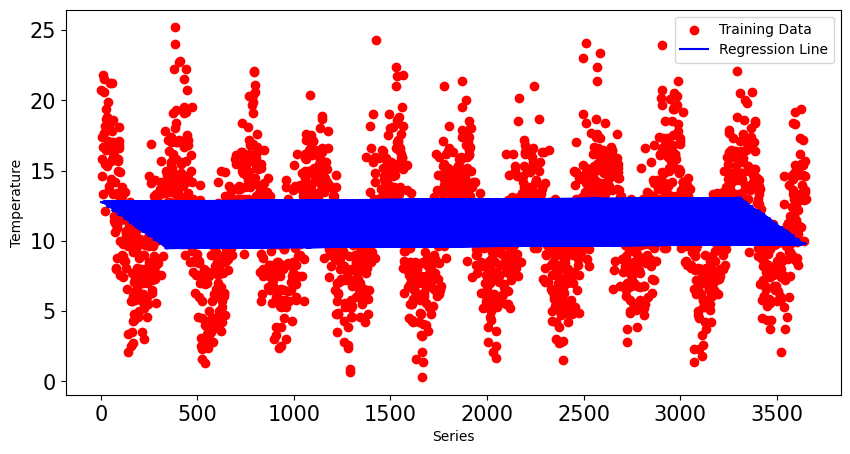

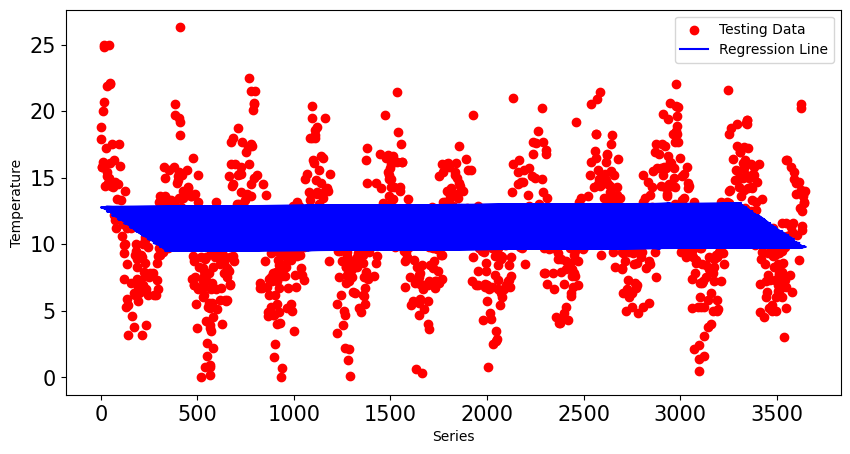

Coefficients: [ 0.0014056  -0.48340405 -0.34063787]
Intercept: 970.7231421664311

Regression Report
------------------
Mean Absolute Error (MAE): 3.18
Mean Squared Error (MSE): 16.08
R-squared (R2): 0.08


In [23]:
# Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Load the dataset
dataset = pd.read_csv('Temperature.csv')

# Display the dataset
print(dataset.head())

# Convert the 'Date' column to datetime format
dataset['Date'] = pd.to_datetime(dataset['Date'], dayfirst=True)

# Create 12-month moving average
dataset['MA12'] = dataset['Temp'].rolling(12).mean()

# Plot the temperature and moving average
plt.figure(figsize=(10, 5))
plt.plot(dataset['Date'], dataset['Temp'], color='red', label='Temperature')
plt.plot(dataset['Date'], dataset['MA12'], color='blue', label='12-Month MA')
plt.xlabel('Date')
plt.ylabel('Temperature')
plt.legend()
plt.show()

# Extract month and year from dates
dataset['Month'] = dataset['Date'].dt.month
dataset['Year'] = dataset['Date'].dt.year

# Create a sequence of numbers
dataset['Series'] = np.arange(1, len(dataset) + 1)

# Drop unnecessary columns and rearrange
dataset.drop(['Date', 'MA12'], axis=1, inplace=True)
dataset = dataset[['Series', 'Year', 'Month', 'Temp']]

# Check the head of the dataset
print(dataset.head())

# Independent Variable (X) and Dependent Variable (y)
X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, -1].values

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=1/3, random_state=0)

# Training the Simple Linear Regression model
reg = LinearRegression()
reg.fit(X_train, y_train)

# Prediction of testing dataset
y_pred = reg.predict(X_test)

# Visualize the results
plt.figure(figsize=(10, 5))
plt.scatter(X_train[:, 0], y_train, color='red', label='Training Data')
plt.plot(X_train[:, 0], reg.predict(X_train), color='blue', label='Regression Line')
plt.xlabel('Series')
plt.ylabel('Temperature')
plt.legend()
plt.show()

# Visualize the results for test set
plt.figure(figsize=(10, 5))
plt.scatter(X_test[:, 0], y_test, color='red', label='Testing Data')
plt.plot(X_train[:, 0], reg.predict(X_train), color='blue', label='Regression Line')
plt.xlabel('Series')
plt.ylabel('Temperature')
plt.legend()
plt.show()

# Coefficient
b = reg.coef_
print("Coefficients:", b)

# Intercept
a = reg.intercept_
print("Intercept:", a)

# Regression Report
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("\nRegression Report")
print("------------------")
print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"R-squared (R2): {r2:.2f}")


Based on the regression report metrics, let's analyze the model's performance:

### Metrics:
- **Mean Absolute Error (MAE): 3.18**
  - MAE indicates that, on average, the predicted temperature deviates from the actual temperature by 3.18 degrees.
  
- **Mean Squared Error (MSE): 16.08**
  - MSE measures the average squared difference between the predicted and actual temperatures. A higher MSE value indicates larger errors, with the squaring penalizing larger errors more than smaller ones.

- **R-squared (R2): 0.08**
  - R-squared explains the proportion of the variance in the dependent variable (temperature) that is predictable from the independent variables (series, year, and month). An R2 value of 0.08 means that only 8% of the variance in temperature can be explained by the model.

### Inference:
1. **Low R-squared Value:**
   - An R-squared value of 0.08 is quite low, suggesting that the model does not explain much of the variability in the temperature data. This implies that the chosen features (Series, Year, and Month) are not very effective in predicting the temperature.

2. **High MAE and MSE:**
   - While these values depend on the range of the temperature values in the dataset, the MAE of 3.18 and MSE of 16.08 suggest that there is a significant error in the predictions. Considering that temperatures usually vary within a limited range, these error values indicate that the model's predictions are not very accurate.

### Possible Reasons for Poor Performance:
1. **Insufficient Features:**
   - The model currently uses Series, Year, and Month as features. Temperature can be influenced by many other factors such as geographical location, altitude, weather patterns, and seasonal effects that are not captured by these features.

2. **Complexity of Temperature Patterns:**
   - Temperature patterns can be complex and influenced by non-linear relationships, which a simple linear regression model might not capture effectively.

### Recommendations:
1. **Feature Engineering:**
   - Introduce additional relevant features such as geographical coordinates, altitude, humidity, or other weather-related variables.
   
2. **Model Complexity:**
   - Consider using more complex models such as polynomial regression, decision trees, random forests, or gradient boosting which can capture non-linear relationships better than simple linear regression.

3. **Time Series Analysis:**
   - Since the data involves dates and temperature, applying time series analysis methods like ARIMA, SARIMA, or LSTM (for more advanced techniques) could potentially yield better predictions.

4. **Cross-Validation:**
   - Use cross-validation to better assess the model's performance and ensure that the results are consistent across different subsets of the data.

By considering these recommendations, you can build a more robust and accurate model for predicting temperature.

# Example 2 :Temp2.csv


### Problem Statement

#### Sales Data Analysis and Visualization

**Objective:**
To analyze and visualize sales data from January 2001 to December 2003, identify patterns, trends, and insights that can help in understanding the sales performance over the given period.

**Dataset:**
The dataset consists of 36 monthly sales records. Each record includes:
- `Month`: The month of the sales data in 'MM-YY' format.
- `Sales`: The sales figures for that month.
- `Time_Stamp`: The corresponding datetime for the given month.

**Goals:**
1. **Data Processing:**
   - Load the dataset.
   - Convert the 'Month' column to a datetime format and set it as the index.
   - Drop unnecessary columns for further analysis.

2. **Exploratory Data Analysis (EDA):**
   - Plot the sales data over time to visualize trends.
   - Create boxplots to understand the distribution of sales data across different years and months.
   - Generate pivot tables to analyze monthly and quarterly sales across different years.
   - Calculate and visualize the Empirical Cumulative Distribution Function (ECDF) of sales.
   - Group the data by date to get average sales and percent changes over time.
   - Visualize the average sales over time and the percent change in sales.
   - Plot the average monthly sales for each year.
   - Calculate and visualize the total yearly sales.

3. **Statistical Analysis:**
   - Perform statistical analysis to derive meaningful insights from the sales data.
   - Evaluate key metrics such as mean sales, median sales, and sales variability.

**Expected Outcomes:**
- **Trends Identification:**
  Identify any upward or downward trends in sales over the given period.
- **Seasonality Analysis:**
  Determine if there are any seasonal patterns in the sales data.
- **Performance Metrics:**
  Calculate key performance metrics to summarize the sales performance.
- **Actionable Insights:**
  Provide insights that can help in decision-making for sales strategies, inventory management, and marketing efforts.

**Tools and Libraries:**
- **Python Libraries:**
  - `pandas` for data manipulation and analysis.
  - `matplotlib` and `seaborn` for data visualization.
  - `statsmodels` for statistical analysis.
- **Jupyter Notebook:**
  - An interactive environment to write and run Python code, visualize data, and document the analysis process.

**Methodology:**
1. **Data Loading and Cleaning:**
   - Read the CSV file and inspect the data.
   - Convert the 'Month' column to a datetime format.
   - Set the 'Time_Stamp' column as the index for time series analysis.
   - Drop unnecessary columns.

2. **Visualization and Analysis:**
   - Plot the sales data over time.
   - Create boxplots to understand sales distribution by year and month.
   - Generate pivot tables for monthly and quarterly analysis.
   - Plot the ECDF of sales.
   - Calculate and visualize average sales and percent change over time.
   - Plot average monthly sales by year and total yearly sales.

3. **Interpretation:**
   - Interpret the visualizations and statistical metrics to derive insights.
   - Identify any significant patterns or anomalies in the sales data.
   - Summarize the findings and provide recommendations based on the analysis.

By following this approach, the analysis will provide a comprehensive understanding of the sales performance from January 2001 to December 2003, aiding in strategic planning and decision-making.

  Month  Sales
0  1-01  266.0
1  1-02  145.9
2  1-03  183.1
3  1-04  119.3
4  1-05  180.3
(36, 2)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36 entries, 0 to 35
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Month   36 non-null     object 
 1   Sales   36 non-null     float64
dtypes: float64(1), object(1)
memory usage: 704.0+ bytes
None
DatetimeIndex(['2001-01-31', '2001-02-28', '2001-03-31', '2001-04-30',
               '2001-05-31', '2001-06-30', '2001-07-31', '2001-08-31',
               '2001-09-30', '2001-10-31', '2001-11-30', '2001-12-31',
               '2002-01-31', '2002-02-28', '2002-03-31', '2002-04-30',
               '2002-05-31', '2002-06-30', '2002-07-31', '2002-08-31',
               '2002-09-30', '2002-10-31', '2002-11-30', '2002-12-31',
               '2003-01-31', '2003-02-28', '2003-03-31', '2003-04-30',
               '2003-05-31', '2003-06-30', '2003-07-31', '2003-08-31',
               '2003-0

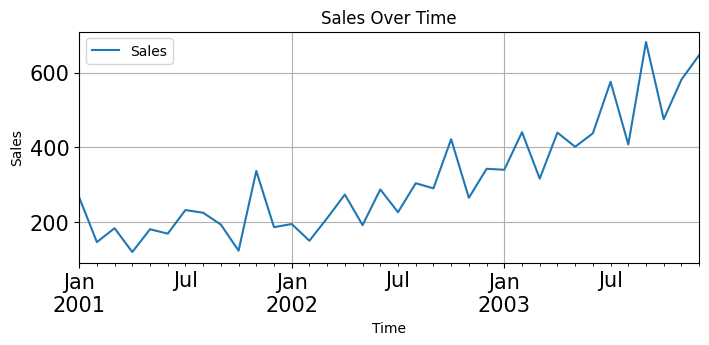

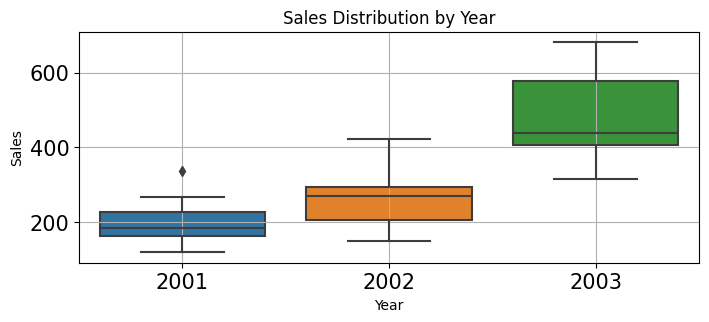

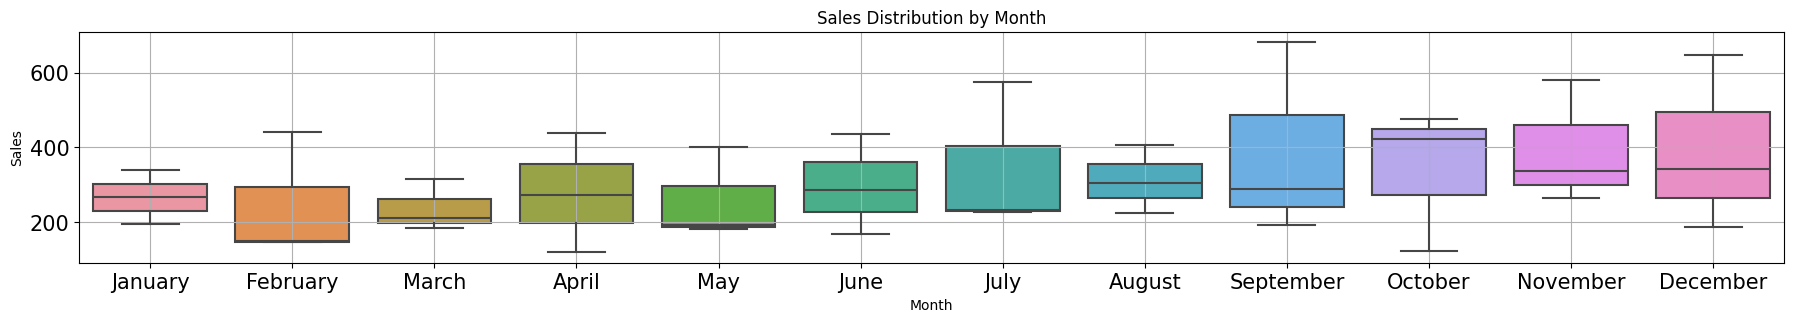

Time_Stamp  April  August  December  February  January   July   June  March  \
Time_Stamp                                                                    
2001        119.3   224.5     185.9     145.9    266.0  231.8  168.5  183.1   
2002        273.3   303.6     342.3     149.5    194.3  226.0  287.0  210.1   
2003        439.3   407.6     646.9     440.4    339.7  575.5  437.4  315.9   

Time_Stamp    May  November  October  September  
Time_Stamp                                       
2001        180.3     336.5    122.9      192.8  
2002        191.4     264.5    421.6      289.9  
2003        401.3     581.3    475.3      682.0  


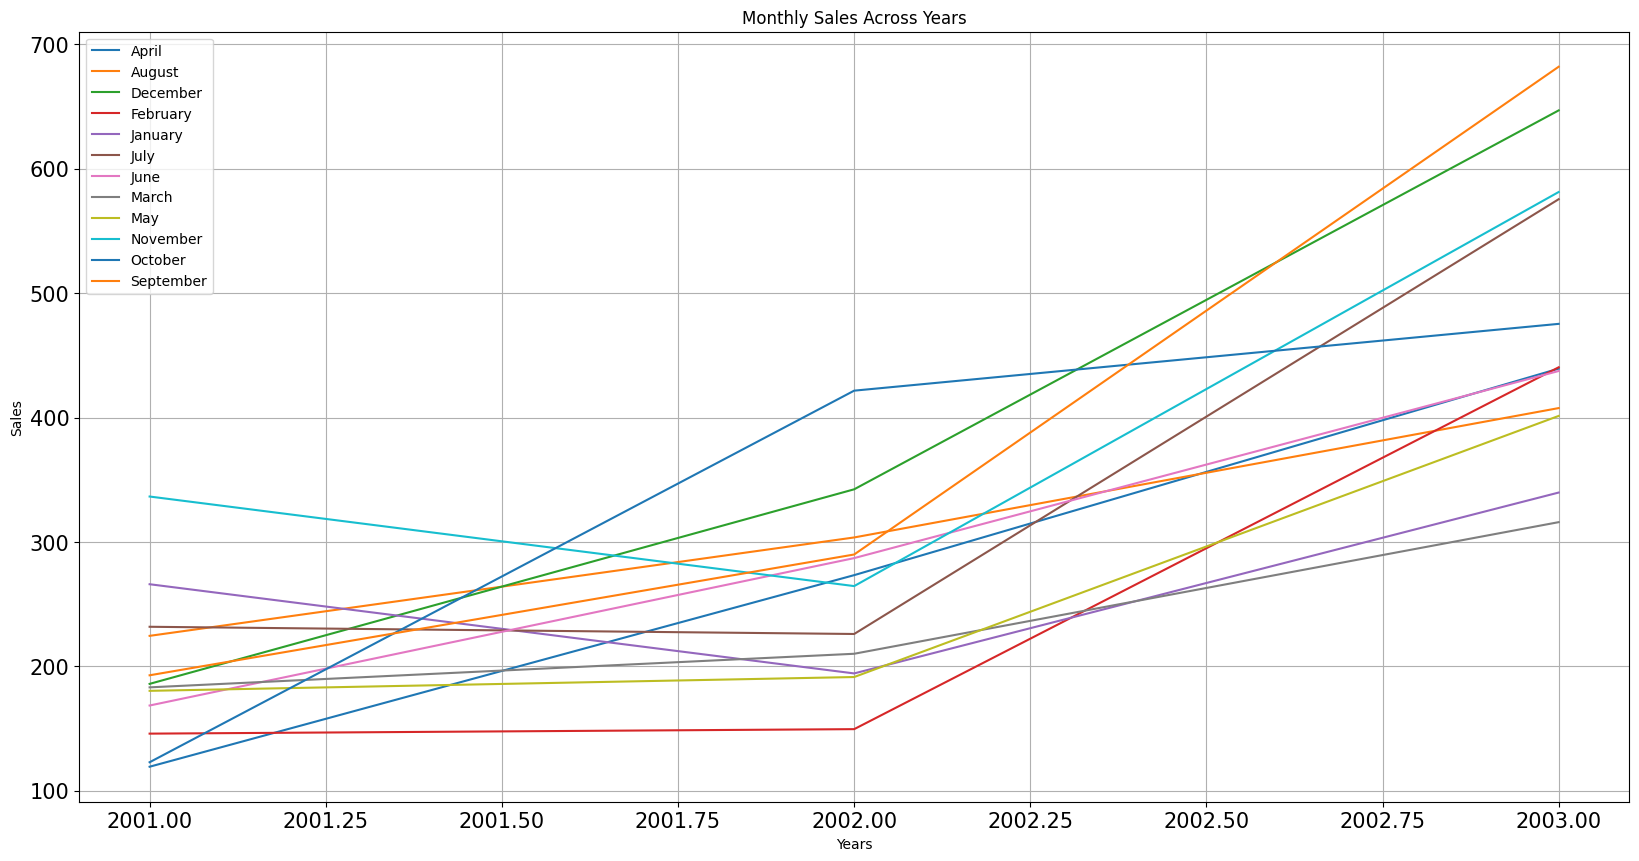

Time_Stamp           1           2           3           4
Time_Stamp                                                
2001        198.333333  156.033333  216.366667  215.100000
2002        184.633333  250.566667  273.166667  342.800000
2003        365.333333  426.000000  555.033333  567.833333


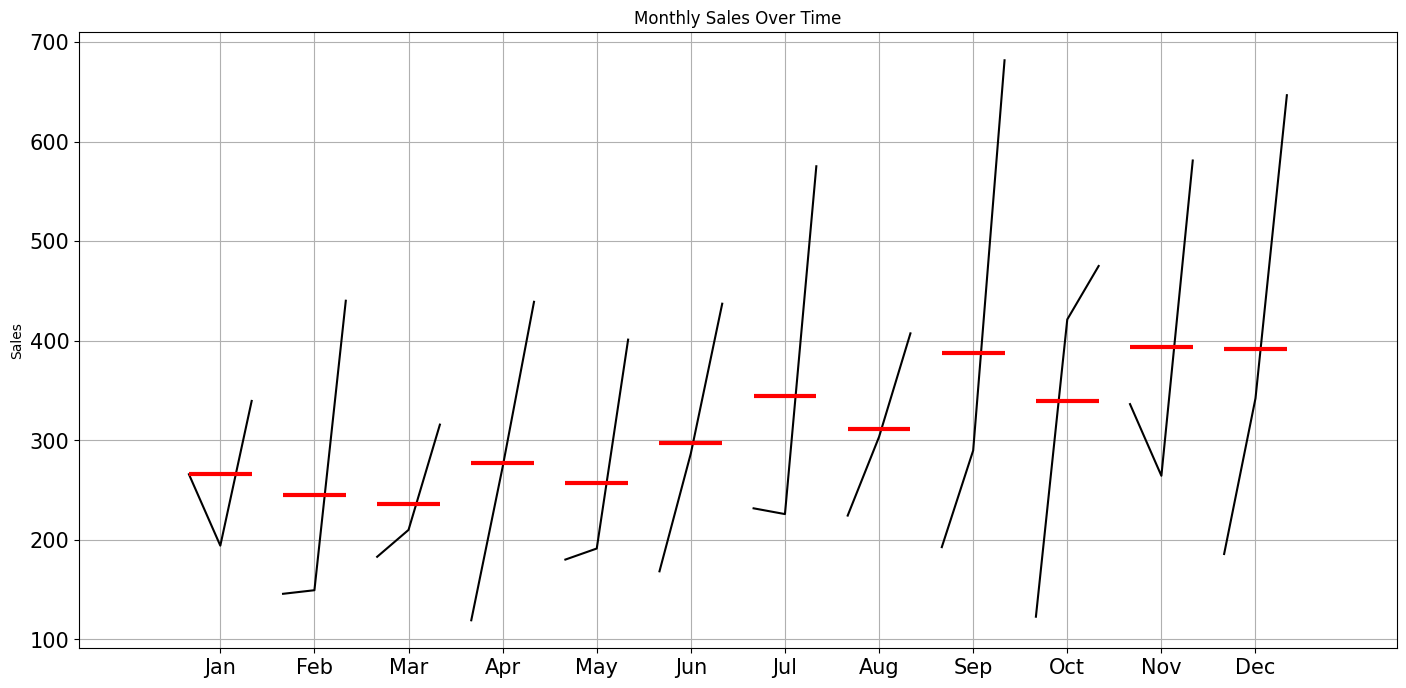

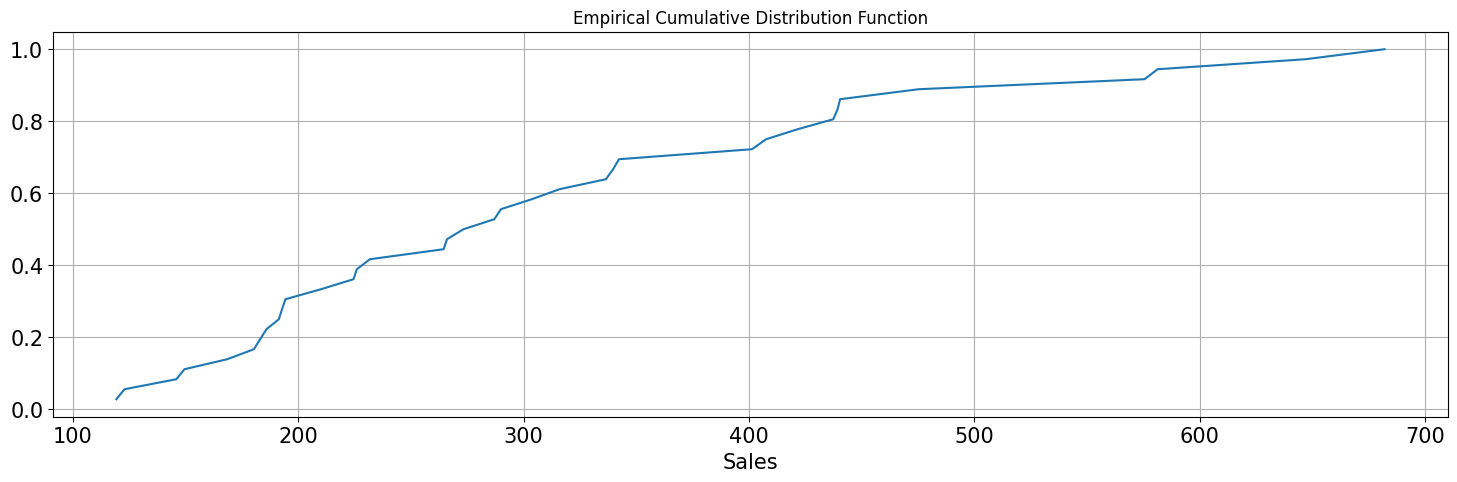

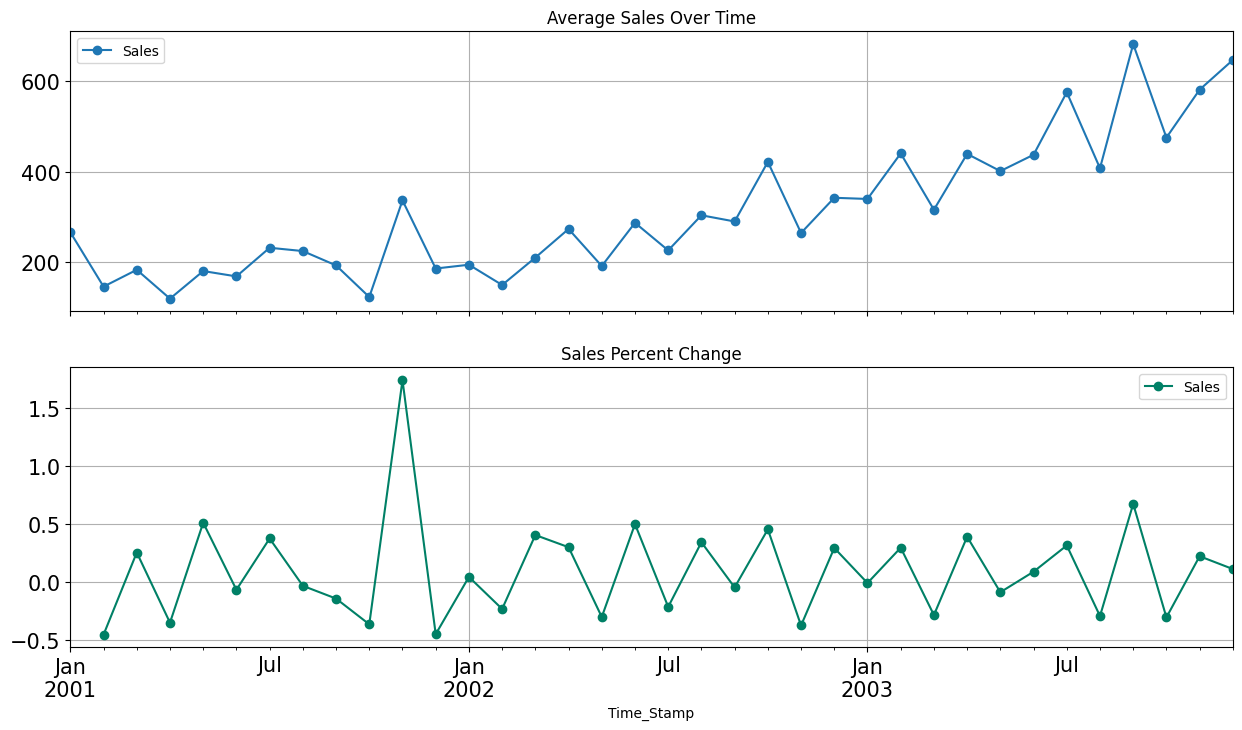

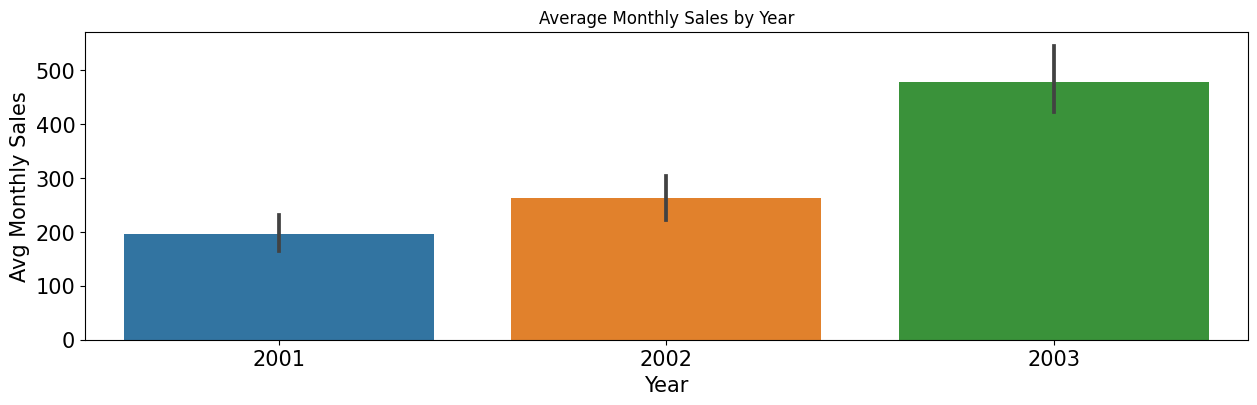

Time_Stamp
2001    2357.5
2002    3153.5
2003    5742.6
dtype: float64


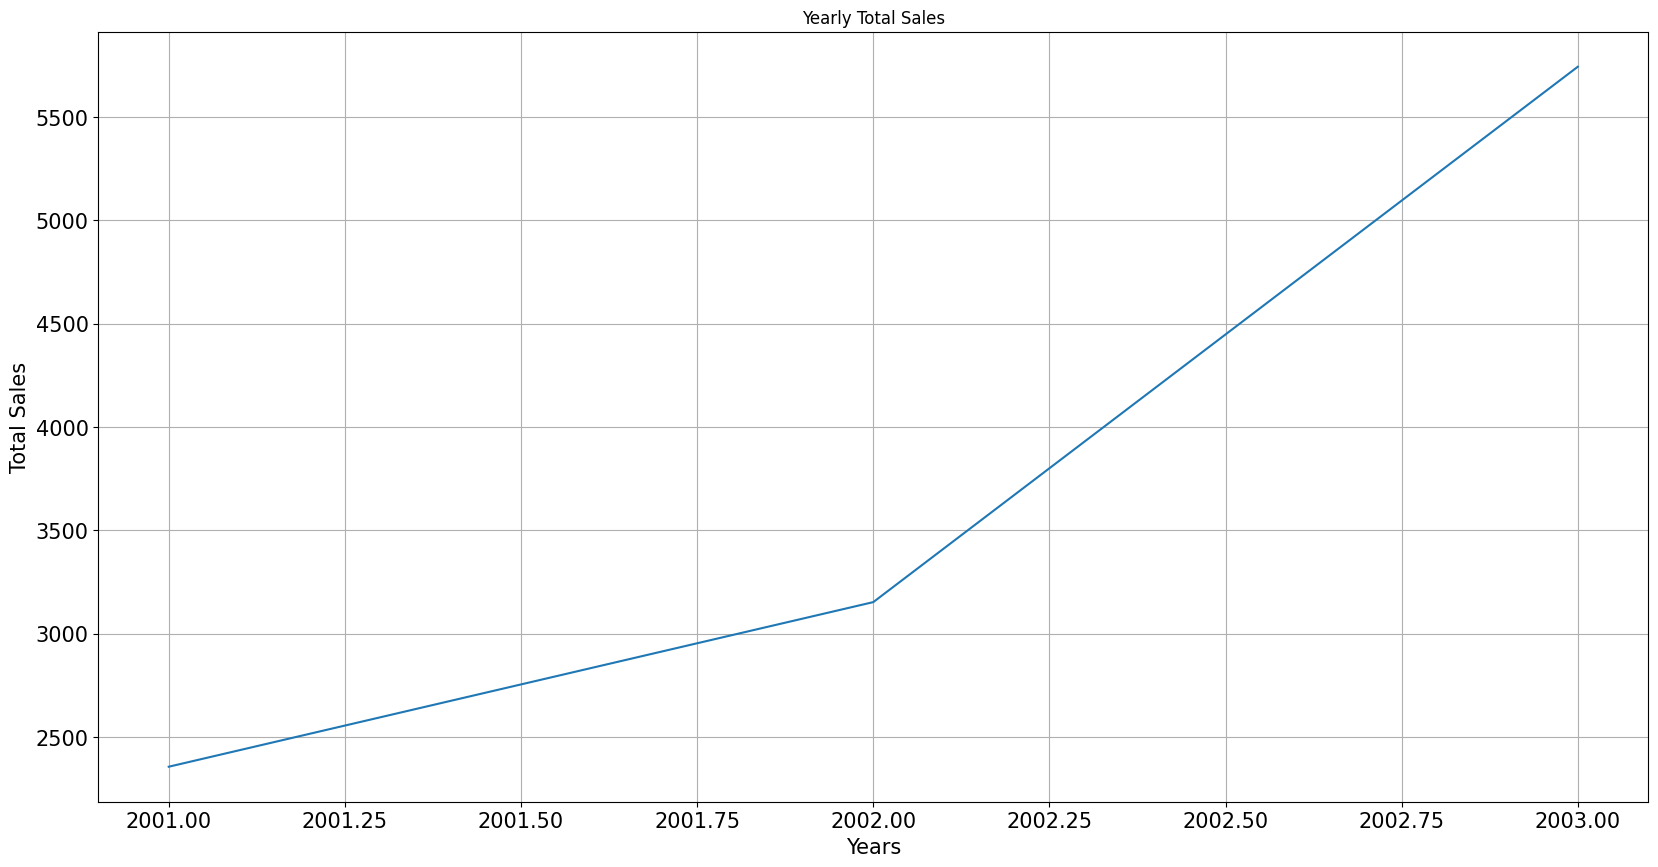

In [25]:
# Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from pylab import rcParams
from statsmodels.graphics.tsaplots import month_plot
from statsmodels.distributions.empirical_distribution import ECDF

# Load the dataset
df = pd.read_csv('Temp2.csv')

# Display the first few rows of the dataset
print(df.head())

# Check the shape and information of the dataset
print(df.shape)
print(df.info())

# Create a date range for the time stamps
date = pd.date_range(start='1/1/2001', end='12/31/2003', freq='M')
print(date)

# Add the date range to the dataframe
df['Time_Stamp'] = pd.DataFrame(date, columns=['Date'])
print(df.head())

# Set the Time_Stamp column as the index
df = df.set_index('Time_Stamp')
print(df.head())

# Drop the 'Month' column as it is not needed anymore
df1 = df.drop(['Month'], axis=1)
print(df1.head())

# Plot the sales data
df1.plot(figsize=(8, 3))
plt.grid()
plt.title("Sales Over Time")
plt.xlabel("Time")
plt.ylabel("Sales")
plt.show()

# Boxplot of sales data by year
_, ax = plt.subplots(figsize=(8, 3))
sns.boxplot(x=df1.index.year, y=df1.values[:, 0], ax=ax)
plt.grid()
plt.title("Sales Distribution by Year")
plt.xlabel("Year")
plt.ylabel("Sales")
plt.show()

# Boxplot of sales data by month
_, ax = plt.subplots(figsize=(22, 3))
sns.boxplot(x=df1.index.month_name(), y=df1.values[:, 0], ax=ax)
plt.grid()
plt.title("Sales Distribution by Month")
plt.xlabel("Month")
plt.ylabel("Sales")
plt.show()

# Pivot table of monthly sales across years
monthly_sales_across_years = pd.pivot_table(df1, values='Sales', columns=df1.index.month_name(), index=df1.index.year)
print(monthly_sales_across_years)

# Plot the pivot table of monthly sales across years
monthly_sales_across_years.plot(figsize=(20, 10))
plt.grid()
plt.title("Monthly Sales Across Years")
plt.xlabel("Years")
plt.ylabel("Sales")
plt.legend(loc='best')
plt.show()

# Pivot table of quarterly turnover
quarterly_turnover = pd.pivot_table(df1, values="Sales", columns=df1.index.quarter, index=df1.index.year)
print(quarterly_turnover)

# Plot monthly sales over time
rcParams['figure.figsize'] = 17, 8
plt.rc('xtick', labelsize=15)
plt.rc('ytick', labelsize=15)
month_plot(df1['Sales'], ylabel='Sales')
plt.grid()
plt.title("Monthly Sales Over Time")
plt.show()

# Empirical Cumulative Distribution Function (ECDF)
plt.figure(figsize=(18, 5))
cdf = ECDF(df1['Sales'])
plt.plot(cdf.x, cdf.y, label="statmodels")
plt.grid()
plt.rc('xtick', labelsize=15)
plt.rc('ytick', labelsize=15)
plt.xlabel('Sales', fontsize=15)
plt.title("Empirical Cumulative Distribution Function")
plt.show()

# Group by date and get average Sales, and percent change
average = df1.groupby(df1.index)["Sales"].mean()
pct_change = df1.groupby(df1.index)["Sales"].sum().pct_change()

# Plot average Sales over time
fig, (axis1, axis2) = plt.subplots(2, 1, sharex=True, figsize=(15, 8))
ax1 = average.plot(legend=True, ax=axis1, marker='o', title="Average Sales Over Time", grid=True)
ax1.set_xticks(range(len(average)))
ax1.set_xticklabels(average.index.tolist())

# Plot percent change for Sales over time
ax2 = pct_change.plot(legend=True, ax=axis2, marker='o', colormap="summer", title="Sales Percent Change", grid=True)
plt.show()

# Plot sales for every year
fig, axis1 = plt.subplots(1, figsize=(15, 4))
sns.barplot(x=df1.index.year, y=df1.values[:, 0], ax=axis1)
plt.rc('xtick', labelsize=15)
plt.rc('ytick', labelsize=15)
plt.xlabel('Year', fontsize=15)
plt.ylabel('Avg Monthly Sales', fontsize=15)
plt.title("Average Monthly Sales by Year")
plt.show()

# Calculate yearly total sales
yearly_total_sales = monthly_sales_across_years.sum(axis=1, skipna=True)
print(yearly_total_sales)

# Plot yearly total sales
yearly_total_sales.plot(figsize=(20, 10))
plt.grid()
plt.xlabel('Years', fontsize=15)
plt.ylabel('Total Sales', fontsize=15)
plt.title("Yearly Total Sales")
plt.rc('xtick', labelsize=15)
plt.rc('ytick', labelsize=15)
plt.show()


# Example 3: ADF Test and ARIMA Model

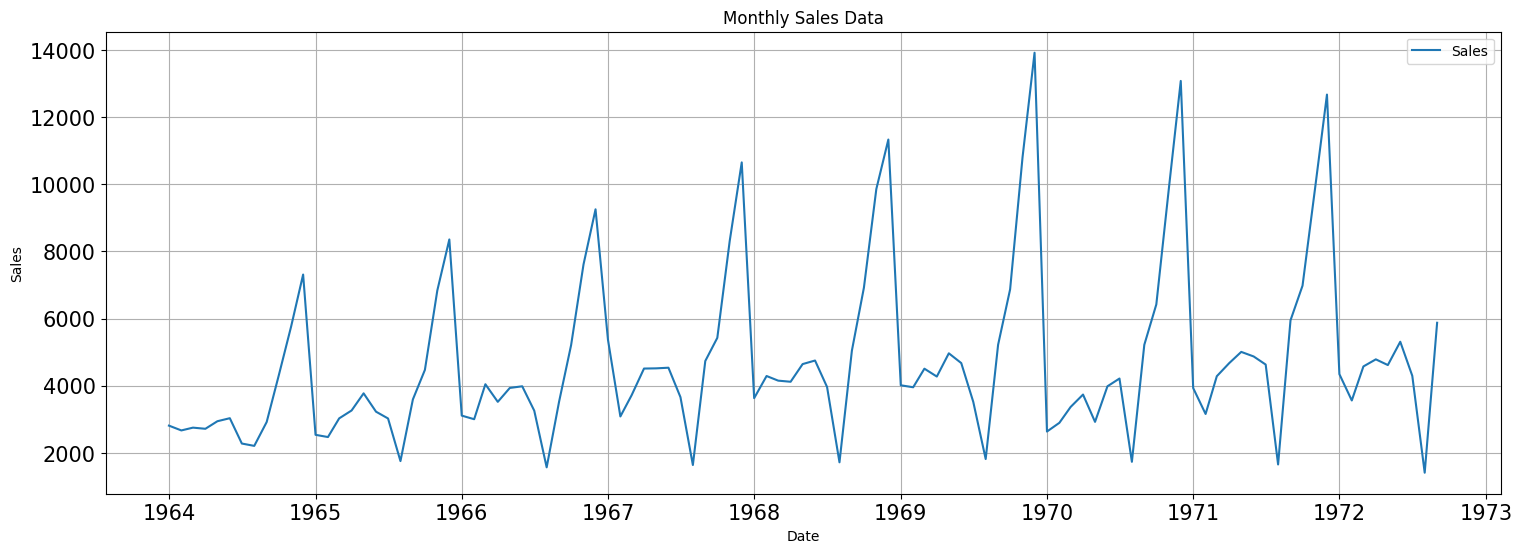

ADF Test for Sales Data
ADF Test Statistic : -1.8335930563276248
p-value : 0.363915771660244
#Lags Used : 11
Number of Observations Used : 93
Weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary.

ADF Test for Differenced Sales Data
ADF Test Statistic : -7.189896448051015
p-value : 2.5196204473868427e-10
#Lags Used : 11
Number of Observations Used : 92
Strong evidence against the null hypothesis (Ho), reject the null hypothesis. Data has no unit root and is stationary.


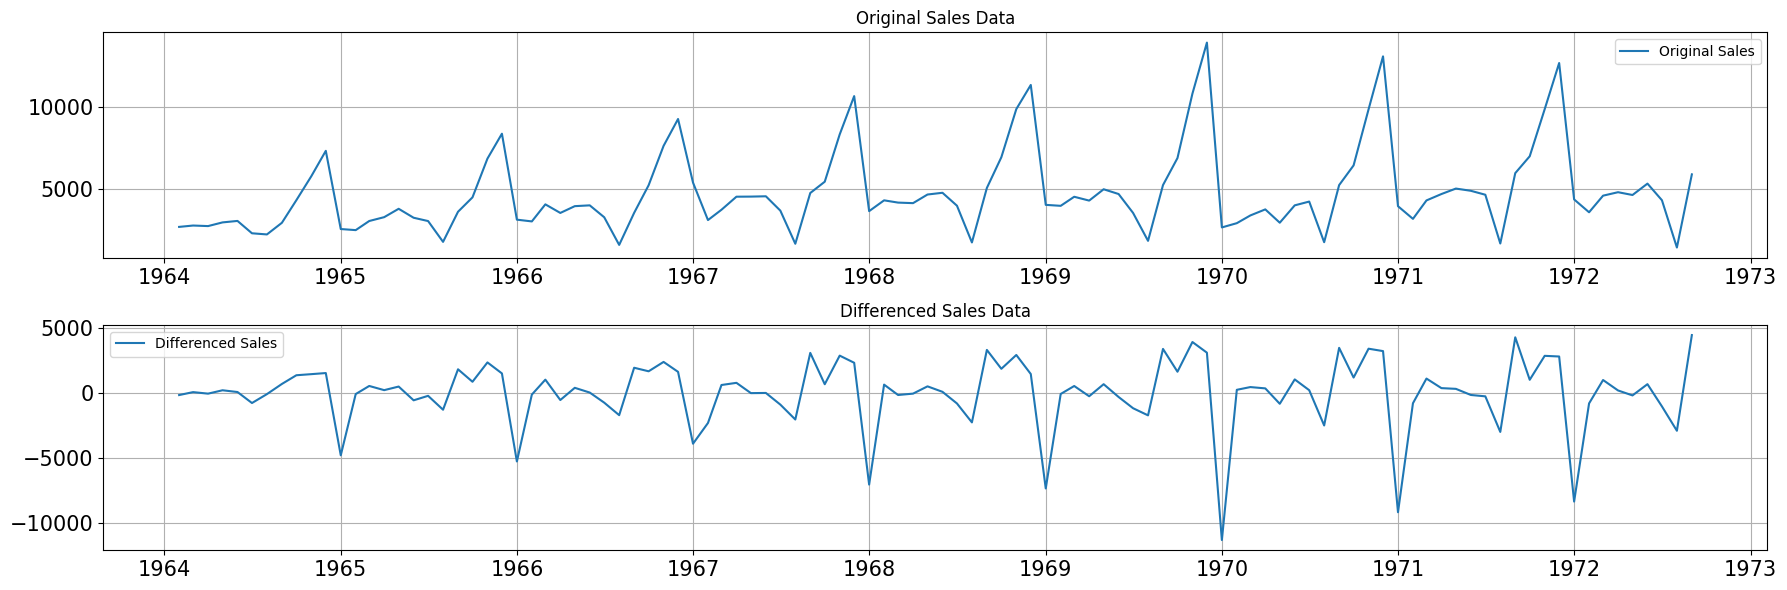

D:\Anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
D:\Anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
D:\Anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\DELL\AppData\Local\Temp\ipykernel_9064\4003924683.py:85: FutureWarning: Argument `closed` is deprecated in favor of `inclusive`.
  forecast_dates = pd.date_range(start=df.index[-1], periods=forecast_steps+1, closed='right')


                               SARIMAX Results                                
Dep. Variable:                  Sales   No. Observations:                  104
Model:                 ARIMA(1, 1, 1)   Log Likelihood                -944.500
Date:                Thu, 04 Jul 2024   AIC                           1895.000
Time:                        08:02:06   BIC                           1902.904
Sample:                    02-01-1964   HQIC                          1898.201
                         - 09-01-1972                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.4822      0.079      6.109      0.000       0.328       0.637
ma.L1         -0.9979      0.245     -4.080      0.000      -1.477      -0.519
sigma2      5.231e+06   1.22e+06      4.275      0.0

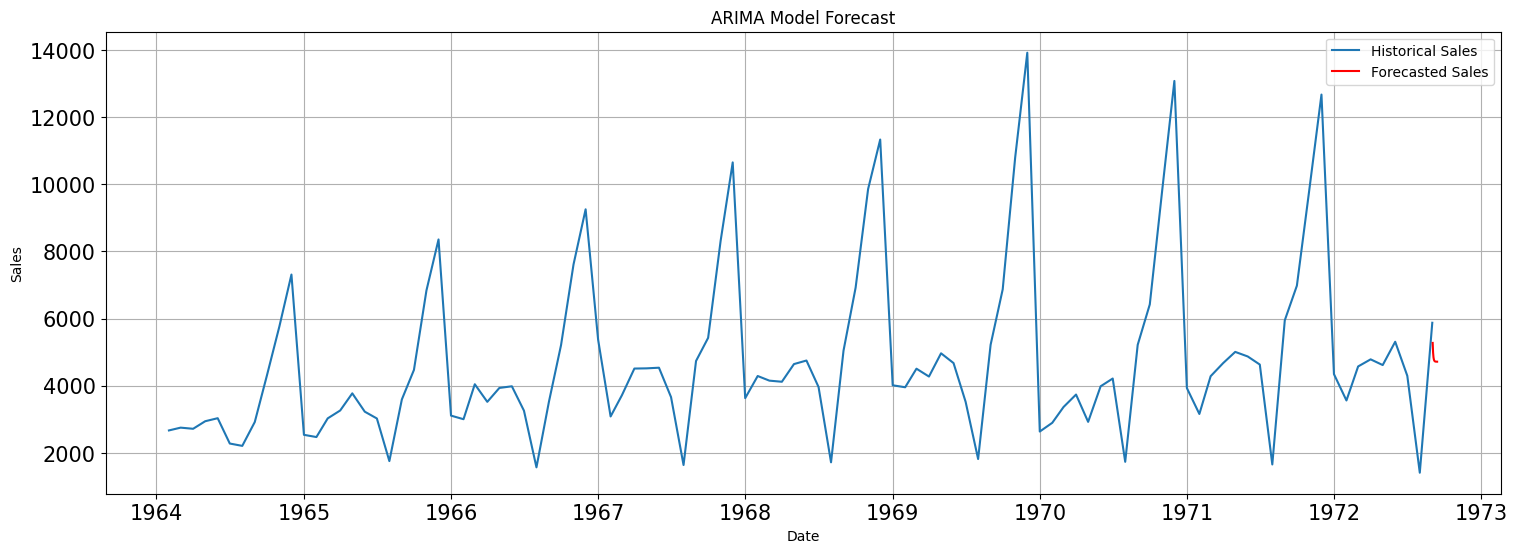

Regression Report for ARIMA Model
------------------
Mean Absolute Error (MAE): 2359.38
Mean Squared Error (MSE): 9082825.68
R-squared (R2): -0.58

Inference:
The Mean Absolute Error (MAE) of 2359.38 and Mean Squared Error (MSE) of 9082825.68 indicate the average magnitude of errors in the predictions. The R-squared (R2) value of -0.58 suggests that -58.14% of the variance in the sales data is explained by the ARIMA model, which indicates how well the model fits the test data.


D:\Anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
D:\Anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
D:\Anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


In [26]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
%matplotlib inline

# Load the dataset
df = pd.read_csv('salesdata.csv')

# Cleaning up the data
df.columns = ["Month", "Sales"]  # Rename columns for easier access
df.dropna(inplace=True)  # Drop any rows with missing values

# Convert Month into Datetime
df['Month'] = pd.to_datetime(df['Month'])

# Set Month as the index
df.set_index('Month', inplace=True)

# Plot the sales data
plt.figure(figsize=(18, 6))
plt.plot(df.index, df['Sales'], label='Sales')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.title('Monthly Sales Data')
plt.legend()
plt.grid(True)
plt.show()

# Function to perform the ADFuller test
def adfuller_test(sales):
    result = adfuller(sales)
    labels = ['ADF Test Statistic', 'p-value', '#Lags Used', 'Number of Observations Used']
    for value, label in zip(result, labels):
        print(f"{label} : {value}")
    if result[1] <= 0.05:
        print("Strong evidence against the null hypothesis (Ho), reject the null hypothesis. Data has no unit root and is stationary.")
    else:
        print("Weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary.")

# Perform the ADFuller test on the sales data
print("ADF Test for Sales Data")
adfuller_test(df['Sales'])

# Differencing to make the data stationary
df['Sales First Difference'] = df['Sales'].diff()

# Drop NA values for differencing
df.dropna(inplace=True)

# Perform the ADFuller test on the differenced data
print("\nADF Test for Differenced Sales Data")
adfuller_test(df['Sales First Difference'])

# Plot the original and differenced data
plt.figure(figsize=(18, 6))
plt.subplot(211)
plt.plot(df.index, df['Sales'], label='Original Sales')
plt.title('Original Sales Data')
plt.grid(True)
plt.legend()

plt.subplot(212)
plt.plot(df.index, df['Sales First Difference'], label='Differenced Sales')
plt.title('Differenced Sales Data')
plt.grid(True)
plt.legend()

plt.tight_layout()
plt.show()

# Build the ARIMA model
model = ARIMA(df['Sales'], order=(1, 1, 1))  # (p, d, q)
model_fit = model.fit()

# Print the summary of the model
print(model_fit.summary())

# Forecast future values
forecast_steps = 12  # Number of periods to forecast
forecast = model_fit.forecast(steps=forecast_steps)
forecast_dates = pd.date_range(start=df.index[-1], periods=forecast_steps+1, closed='right')

# Plot the forecast
plt.figure(figsize=(18, 6))
plt.plot(df.index, df['Sales'], label='Historical Sales')
plt.plot(forecast_dates, forecast, label='Forecasted Sales', color='red')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.title('ARIMA Model Forecast')
plt.legend()
plt.grid(True)
plt.show()

# Evaluation Metrics
# Splitting data for training and testing
train_size = int(len(df) * 0.8)
train, test = df[0:train_size], df[train_size:len(df)]

# Fit the ARIMA model on training data
model = ARIMA(train['Sales'], order=(1, 1, 1))  # (p, d, q)
model_fit = model.fit()

# Forecast the sales on test data
forecast_test = model_fit.forecast(steps=len(test))

# Evaluation metrics calculation
mae = mean_absolute_error(test['Sales'], forecast_test)
mse = mean_squared_error(test['Sales'], forecast_test)
r2 = r2_score(test['Sales'], forecast_test)

print("Regression Report for ARIMA Model")
print("------------------")
print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"R-squared (R2): {r2:.2f}")

# Interpretation of results
print("\nInference:")
print(f"The Mean Absolute Error (MAE) of {mae:.2f} and Mean Squared Error (MSE) of {mse:.2f} indicate the average magnitude of errors in the predictions. The R-squared (R2) value of {r2:.2f} suggests that {r2*100:.2f}% of the variance in the sales data is explained by the ARIMA model, which indicates how well the model fits the test data.")


### Explanation of Results

#### 1. Augmented Dickey-Fuller (ADF) Test Results

##### ADF Test for Sales Data
- **ADF Test Statistic**: -1.8335930563276248
- **p-value**: 0.363915771660244
- **#Lags Used**: 11
- **Number of Observations Used**: 93
- **Inference**: The p-value is 0.364, which is greater than the common significance level (e.g., 0.05). This indicates weak evidence against the null hypothesis, meaning we fail to reject the null hypothesis that the time series has a unit root. Therefore, the time series is non-stationary.

##### ADF Test for Differenced Sales Data
- **ADF Test Statistic**: -7.189896448051015
- **p-value**: 2.5196204473868427e-10
- **#Lags Used**: 11
- **Number of Observations Used**: 92
- **Inference**: The p-value is significantly lower than 0.05, indicating strong evidence against the null hypothesis. We reject the null hypothesis, meaning the differenced sales data does not have a unit root and is stationary.

#### 2. SARIMAX Model Results

##### Model Summary
- **Dep. Variable**: Sales
- **No. of Observations**: 104
- **Model**: ARIMA(1, 1, 1)
- **Log Likelihood**: -944.500
- **AIC**: 1895.000
- **BIC**: 1902.904
- **HQIC**: 1898.201
- **Sample**: 02-01-1964 to 09-01-1972
- **Covariance Type**: opg

##### Coefficients
- **AR(1) coefficient**: 0.4822 (p-value: 0.000)
  - This suggests a significant positive autoregressive term.
- **MA(1) coefficient**: -0.9979 (p-value: 0.000)
  - This suggests a significant moving average term with a negative sign.
- **sigma2**: 5.231e+06 (p-value: 0.000)
  - The variance of the residuals is significant.

##### Diagnostics
- **Ljung-Box (L1) (Q)**: 0.54 (Prob(Q): 0.46)
  - Indicates no significant autocorrelation in residuals at lag 1.
- **Jarque-Bera (JB)**: 2.78 (Prob(JB): 0.25)
  - Indicates residuals are likely normally distributed.
- **Heteroskedasticity (H)**: 3.15 (Prob(H) (two-sided): 0.00)
  - Indicates potential heteroskedasticity in residuals, i.e., changing variance over time.
- **Skew**: 0.05
- **Kurtosis**: 3.80

##### Regression Report
- **Mean Absolute Error (MAE)**: 2359.38
  - The average absolute error between predicted and actual sales is 2359.38 units.
- **Mean Squared Error (MSE)**: 9082825.68
  - The average squared error is quite high, indicating significant prediction error.
- **R-squared (R2)**: -0.58
  - A negative R-squared value suggests that the model does not fit the data well, and less variance in sales is explained by the model than by the mean of the data.

#### Inference
The ARIMA(1, 1, 1) model indicates some relationship in the data through its significant AR and MA terms. However, the high MAE and MSE values, combined with the negative R-squared, suggest that the model does not accurately predict sales. This could be due to various factors such as model misspecification, insufficient data, or inherent unpredictability in the sales data. Further model refinement or the inclusion of additional explanatory variables might improve the performance.

# Example 4: Timeseries with RNN

# Sure! Here's a detailed problem statement for the given time series prediction problem using a Recurrent Neural Network (RNN):

---

### Problem Statement: Time Series Prediction of Daily Maximum Temperature in Seattle

#### Objective:
The goal of this project is to develop a Recurrent Neural Network (RNN) model to predict the daily maximum temperature in Seattle using historical weather data. The model will be trained on past temperature data and will aim to provide accurate temperature predictions for future dates.

#### Dataset:
The dataset contains historical weather data for Seattle, with daily records from January 1, 2012, to December 31, 2016. The dataset includes the following columns:
- **date**: The date of the record.
- **precipitation**: The amount of precipitation in mm.
- **temp_max**: The maximum temperature of the day in degrees Celsius.
- **temp_min**: The minimum temperature of the day in degrees Celsius.
- **wind**: The average wind speed of the day in km/h.
- **weather**: The type of weather (e.g., drizzle, rain).

#### Data Preparation:
1. **Load and inspect the data**: Load the CSV file and inspect the data for any missing or duplicated values.
2. **Feature selection**: Select the `temp_max` column as the target variable for prediction.
3. **Create time series data**: Convert the selected column into a suitable format for time series analysis.
4. **Normalize the data**: Normalize the target variable to improve the performance and convergence of the neural network.

#### Model Design:
1. **Data segmentation**: Split the data into training, validation, and test sets. Use a sliding window approach to create input sequences and corresponding output values. Each input sequence will consist of 10 consecutive days of temperature data, and the output will be the temperature of the following day.
2. **Reshape the data**: Reshape the input data to match the input shape expected by the LSTM layers in the RNN model.
3. **Build the RNN model**:
   - **Layer 1**: LSTM layer with 50 units, `return_sequences=True`, and dropout regularization.
   - **Layer 2**: LSTM layer with 50 units, `return_sequences=True`, and dropout regularization.
   - **Layer 3**: LSTM layer with 50 units, `return_sequences=True`, and dropout regularization.
   - **Layer 4**: LSTM layer with 50 units and dropout regularization.
   - **Output layer**: Dense layer with 1 unit to output the predicted temperature.
4. **Compile the model**: Use the Adam optimizer and mean squared error as the loss function.
5. **Train the model**: Train the model using the training set, and validate it using the validation set. Use early stopping and model checkpointing to avoid overfitting and save the best model.

#### Evaluation:
1. **Loss and validation loss**: Plot the training and validation loss over epochs to monitor the model's performance and convergence.
2. **Prediction**: Generate predictions for the training, validation, and test sets.
3. **Visualization**: Visualize the predicted vs. actual temperatures for the validation and test sets to assess the model's accuracy and reliability.

#### Tools and Libraries:
- Python
- Pandas and NumPy for data manipulation and analysis
- Matplotlib and Seaborn for data visualization
- TensorFlow and Keras for building and training the RNN model

#### Expected Outcome:
A trained RNN model capable of accurately predicting the daily maximum temperature in Seattle based on past temperature data. The model's performance will be evaluated based on its ability to generalize to unseen data, as indicated by the validation and test loss.

---

This problem statement outlines the entire workflow, from data preparation to model evaluation, providing a clear direction for developing and implementing the RNN-based time series prediction model.

In [35]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from keras.models import Sequential
from keras.layers import Dense, LSTM, Dropout
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping
from tensorflow.keras.losses import MeanSquaredError
from tensorflow.keras.metrics import RootMeanSquaredError
from tensorflow.keras.optimizers import Adam

%matplotlib inline


In [36]:
# Load the dataset
df = pd.read_csv('seattle-weather.csv')

# Check for missing values and duplicates
print(df.isnull().sum())
print(df.duplicated().sum())

# Extract the relevant column for time series prediction (temp_max in this case)
training_set = df['temp_max'].values

# Function to convert dataframe into X and y arrays
def df_to_XY(df, window_size=10):
    X_train = []
    y_train = []
    for i in range(window_size, len(df)):
        X_train.append(df[i-window_size:i])
        y_train.append(df[i])
    X_train, y_train = np.array(X_train), np.array(y_train)
    return X_train, y_train

WINDOW = 10
X, y = df_to_XY(training_set, WINDOW)

# Split the data into training, validation, and test sets
X_train = X[:800]
y_train = y[:800]
X_val = X[800:1000]
y_val = y[800:1000]
X_test = X[1000:]
y_test = y[1000:]

# Reshape for LSTM input
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))
X_val = np.reshape(X_val, (X_val.shape[0], X_val.shape[1], 1))
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))


date             0
precipitation    0
temp_max         0
temp_min         0
wind             0
weather          0
dtype: int64
0


In [37]:
# Building the RNN
model = Sequential()

# Adding the first LSTM layer and some Dropout regularisation
model.add(LSTM(units=50, return_sequences=True, input_shape=(X_train.shape[1], 1)))
model.add(Dropout(0.2))

# Adding the second LSTM layer and some Dropout regularisation
model.add(LSTM(units=50, return_sequences=True))
model.add(Dropout(0.2))

# Adding the third LSTM layer and some Dropout regularisation
model.add(LSTM(units=50, return_sequences=True))
model.add(Dropout(0.2))

# Adding the fourth LSTM layer and some Dropout regularisation
model.add(LSTM(units=50))
model.add(Dropout(0.2))

# Adding the output layer
model.add(Dense(units=1))

# Compiling the RNN
model.compile(optimizer='adam', loss='mean_squared_error')

# Fitting the RNN to the Training set
history = model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=100, batch_size=32)


Epoch 1/100
25/25 [==============================] - 9s 109ms/step - loss: 204.8526 - val_loss: 235.8568
Epoch 2/100
25/25 [==============================] - 1s 23ms/step - loss: 87.8773 - val_loss: 154.8212
Epoch 3/100
25/25 [==============================] - 1s 28ms/step - loss: 68.1820 - val_loss: 128.2176
Epoch 4/100
25/25 [==============================] - 1s 21ms/step - loss: 61.3592 - val_loss: 112.1417
Epoch 5/100
25/25 [==============================] - 1s 23ms/step - loss: 58.1778 - val_loss: 99.5017
Epoch 6/100
25/25 [==============================] - 1s 31ms/step - loss: 56.3857 - val_loss: 90.9241
Epoch 7/100
25/25 [==============================] - 1s 30ms/step - loss: 55.5356 - val_loss: 85.5651
Epoch 8/100
25/25 [==============================] - 1s 34ms/step - loss: 53.8692 - val_loss: 81.9300
Epoch 9/100
25/25 [==============================] - 1s 28ms/step - loss: 54.2807 - val_loss: 79.4553
Epoch 10/100
25/25 [==============================] - 1s 43ms/step - loss: 5

Epoch 81/100
25/25 [==============================] - 1s 38ms/step - loss: 8.4904 - val_loss: 9.9617
Epoch 82/100
25/25 [==============================] - 1s 30ms/step - loss: 8.7206 - val_loss: 10.4515
Epoch 83/100
25/25 [==============================] - 1s 40ms/step - loss: 8.8347 - val_loss: 9.6834
Epoch 84/100
25/25 [==============================] - 1s 37ms/step - loss: 8.3785 - val_loss: 9.8985
Epoch 85/100
25/25 [==============================] - 1s 24ms/step - loss: 8.2730 - val_loss: 10.1002
Epoch 86/100
25/25 [==============================] - 1s 32ms/step - loss: 8.1766 - val_loss: 9.7422
Epoch 87/100
25/25 [==============================] - 1s 27ms/step - loss: 8.4102 - val_loss: 10.0815
Epoch 88/100
25/25 [==============================] - 1s 34ms/step - loss: 8.4788 - val_loss: 9.7855
Epoch 89/100
25/25 [==============================] - 1s 40ms/step - loss: 8.8177 - val_loss: 9.8875
Epoch 90/100
25/25 [==============================] - 1s 37ms/step - loss: 8.2663 - val_

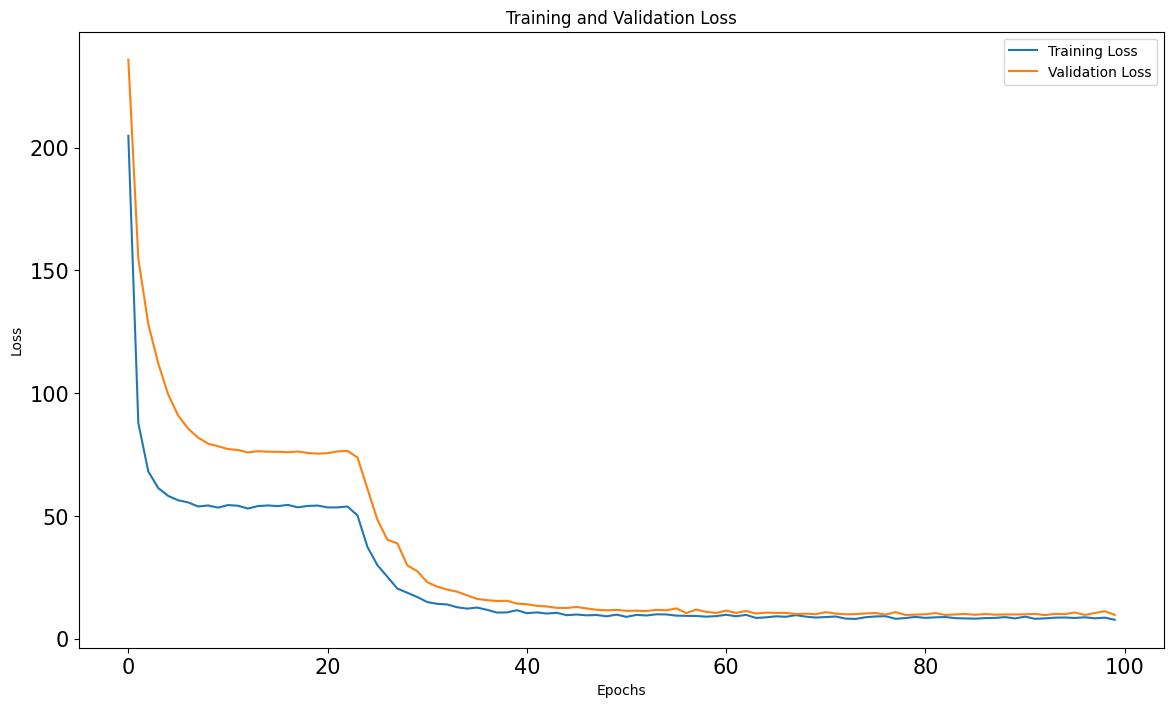

15/15 [==============================] - 0s 7ms/step


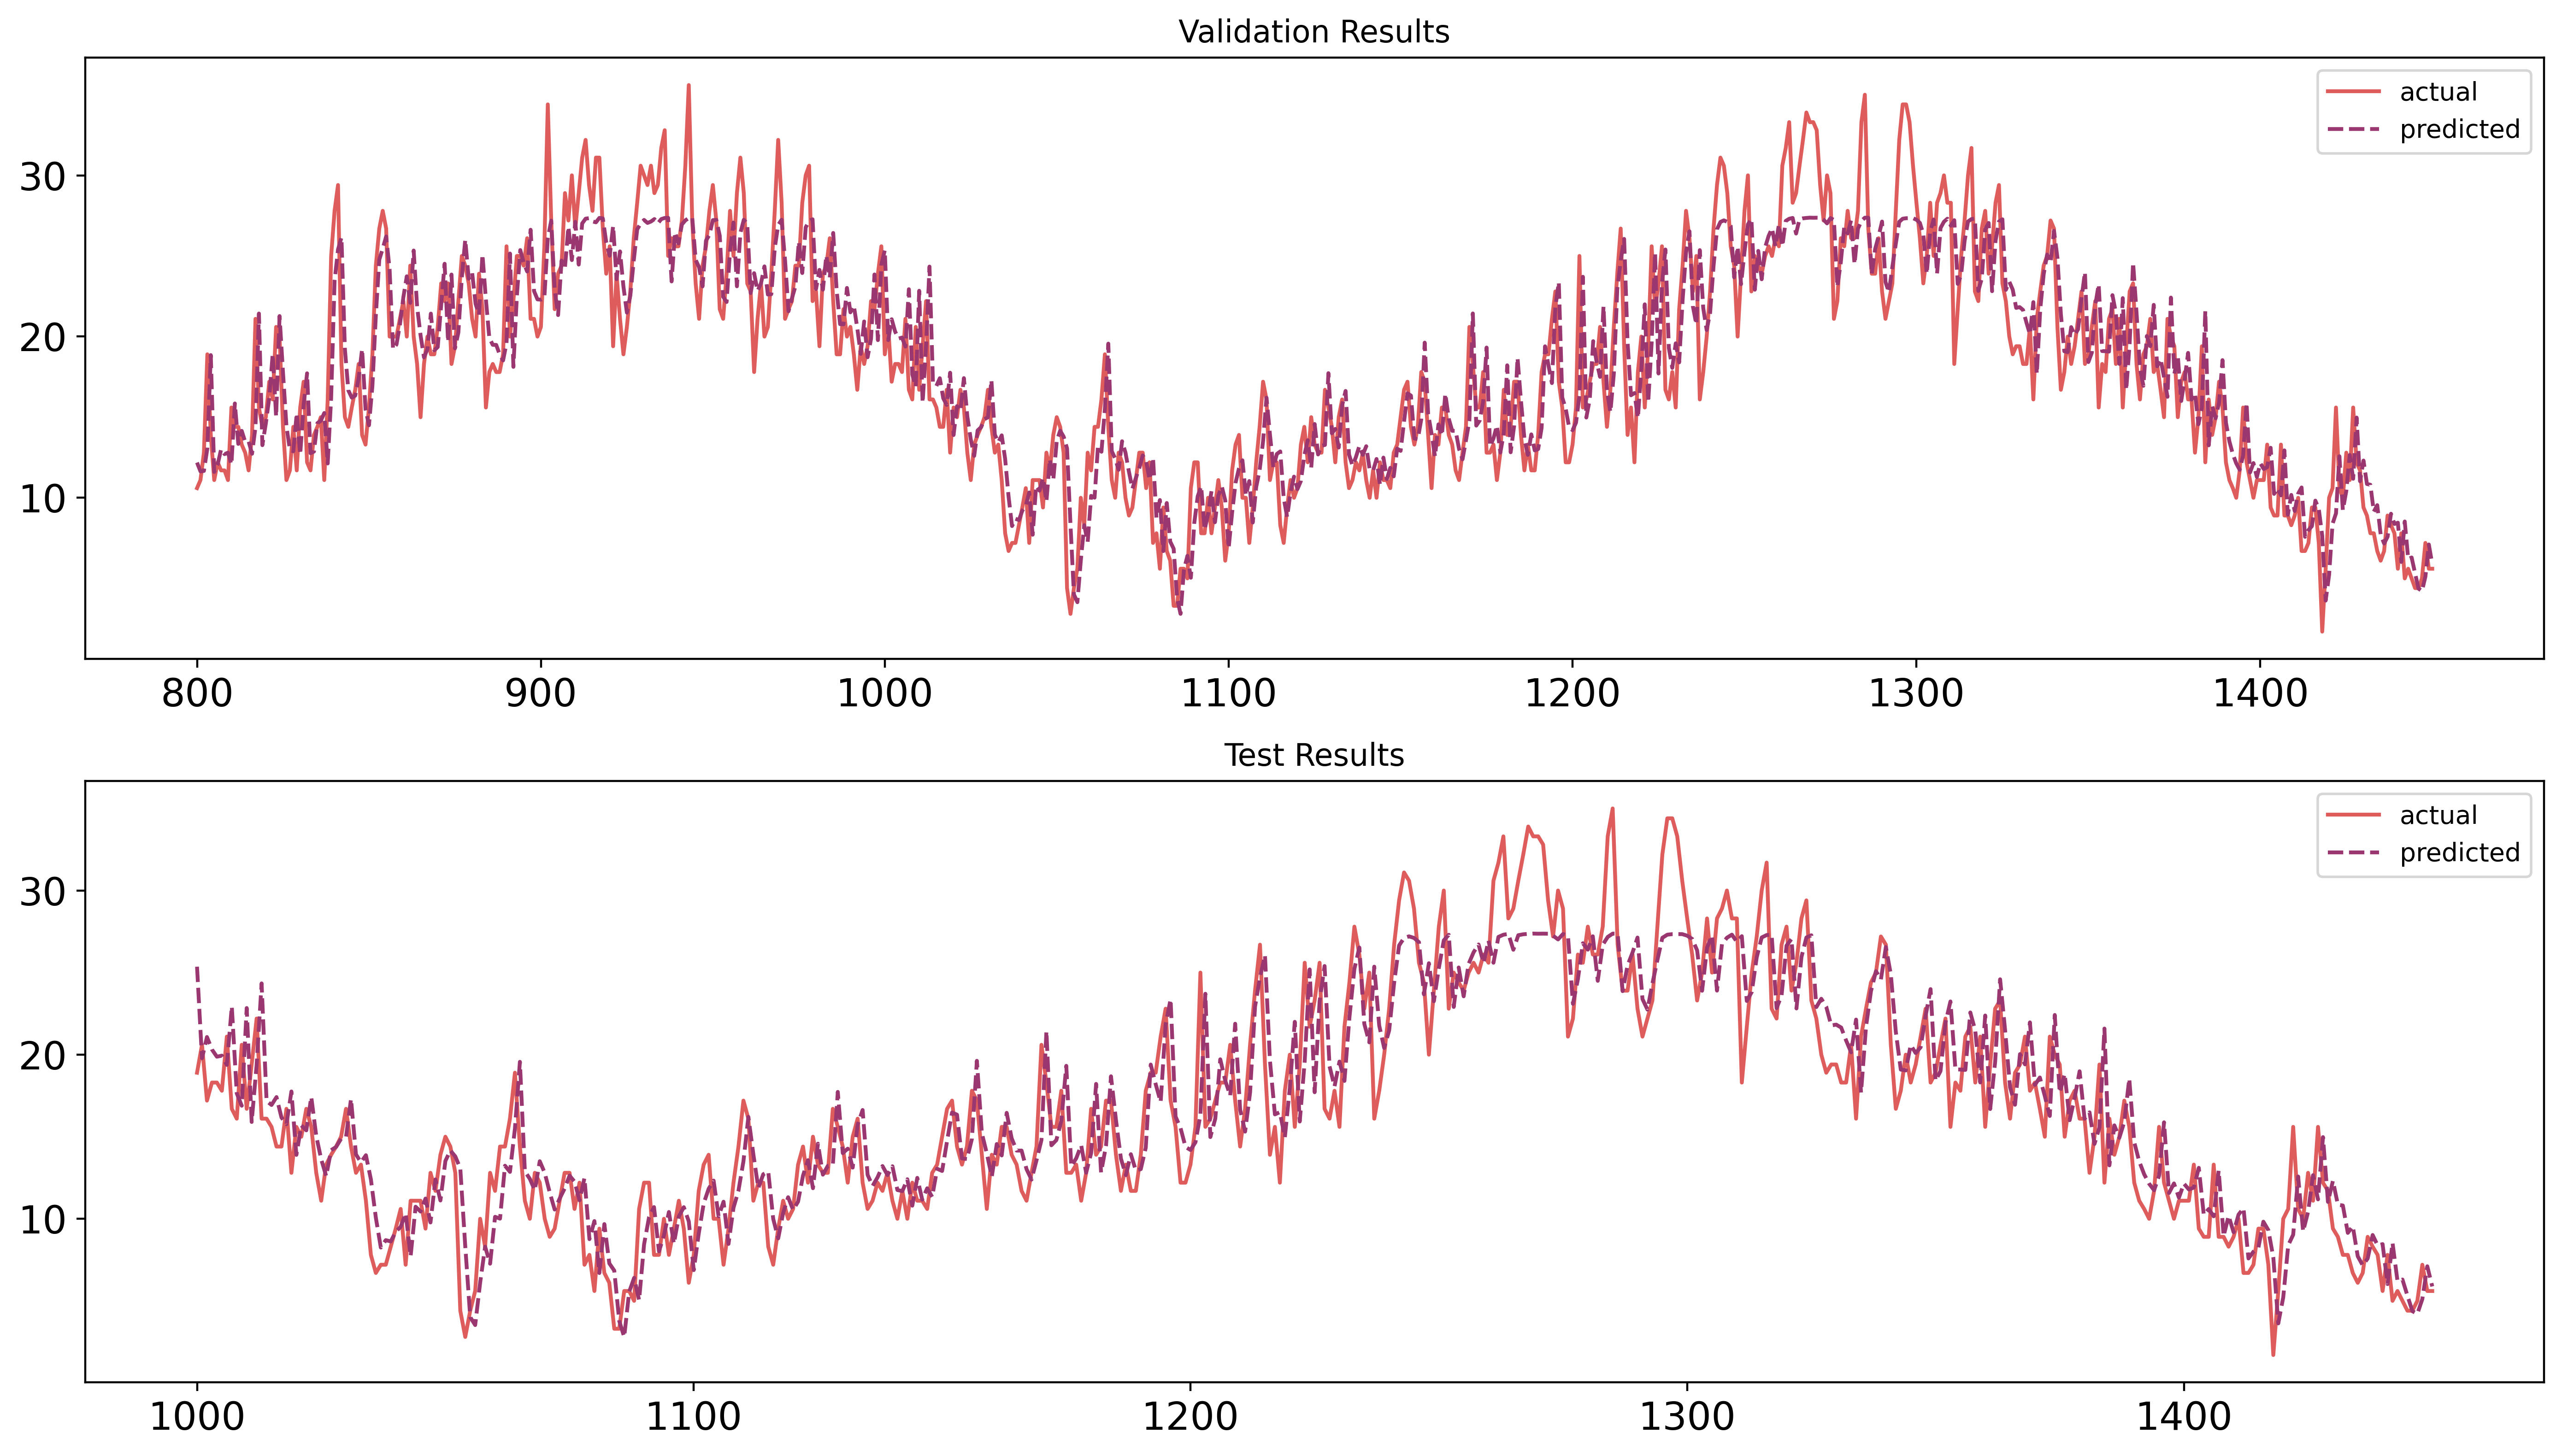

In [38]:
# Convert training history to DataFrame
history_df = pd.DataFrame(history.history)

# Plot training and validation loss
plt.figure(figsize=(14, 8))
plt.plot(history_df['loss'], label='Training Loss')
plt.plot(history_df['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Predicting the results
train_pred = model.predict(X_train).flatten()
val_pred = model.predict(X_val).flatten()
test_pred = model.predict(X_test).flatten()

# Combine predictions into a single array
pred = np.concatenate([train_pred, val_pred, test_pred])

# Create a DataFrame for actual and predicted values
df_pred = pd.DataFrame({'actual': training_set[WINDOW:], 'predicted': pred})

# Plot validation and test results
fig, axes = plt.subplots(2, 1, figsize=(14, 8), dpi=400)

plt.subplot(2, 1, 1)
plt.title("Validation Results")
sns.lineplot(data=df_pred[800:], palette="flare")

plt.subplot(2, 1, 2)
plt.title("Test Results")
sns.lineplot(data=df_pred[1000:], palette="flare")

plt.tight_layout()
plt.show()


# Example 5 : Air passenger Traffic